In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mplt
import matplotlib as plt
import datetime as dati
import squarify # pip install squarify (algorithm for treemap)
sns.set()

In [2]:
dataset = pd.read_csv("./entrenamieto.csv", parse_dates = ['Account_Created_Date', 'Opportunity_Created_Date',
                                                           'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date',
                                                           'Quote_Expiry_Date', 'Last_Modified_Date','Last_Activity' ])
# Limpio registros con muchos datos faltantes o inutiles
dataset = dataset.drop(columns= ['Prod_Category_A','Product_Category_B','Actual_Delivery_Date','Submitted_for_Approval','Last_Activity','Price','Currency','Brand','Size','Product_Type'])
dataset.dtypes

ID                                             int64
Region                                        object
Territory                                     object
Pricing, Delivery_Terms_Quote_Appr             int64
Pricing, Delivery_Terms_Approved               int64
Bureaucratic_Code_0_Approval                   int64
Bureaucratic_Code_0_Approved                   int64
Bureaucratic_Code                             object
Account_Created_Date                  datetime64[ns]
Source                                        object
Billing_Country                               object
Account_Name                                  object
Opportunity_Name                              object
Opportunity_ID                                 int64
Sales_Contract_No                             object
Account_Owner                                 object
Opportunity_Owner                             object
Account_Type                                  object
Opportunity_Type                              

In [3]:
dataset['Opportunity_Created_Date'].value_counts()

2017-06-30    124
2016-01-22    107
2017-05-09    104
2016-05-18     99
2016-01-07     89
             ... 
2016-06-11      1
2017-01-08      1
2015-08-27      1
2015-11-18      1
2015-03-02      1
Name: Opportunity_Created_Date, Length: 1096, dtype: int64

In [4]:
dataset['Opportunity_Created_Date'].isna().value_counts()

False    16947
Name: Opportunity_Created_Date, dtype: int64

In [5]:
dataset[dataset['Total_Amount']>dataset['Total_Taxable_Amount']]['Total_Taxable_Amount'].eq(0).value_counts()

True     899
False     28
Name: Total_Taxable_Amount, dtype: int64

<ipython-input-6-20c12c876e96>:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cor.values[[np.arange(12)]*2] = 0


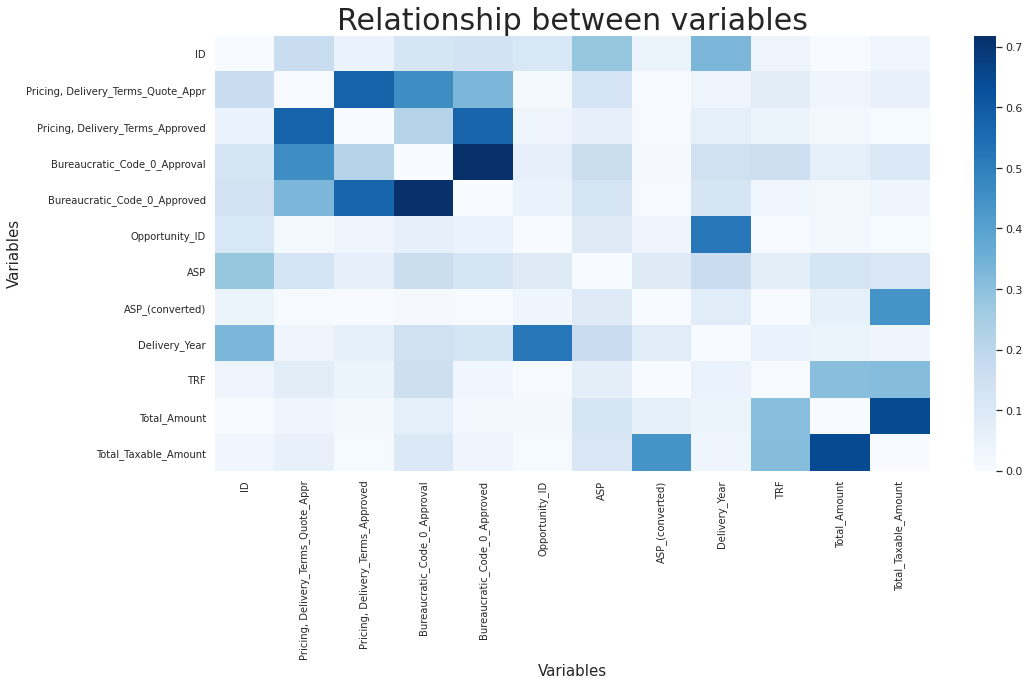

In [6]:
fig, ax = mplt.subplots(figsize=(16,8))         # Sample figsize in inches
cor = dataset.corr().abs()
cor.values[[np.arange(12)]*2] = 0
sns.heatmap(cor,cmap='Blues');
ax.axes.set_title("Relationship between variables",fontsize=30)
ax.set_xlabel("Variables",fontsize=15)
ax.set_ylabel("Variables",fontsize=15)
ax.tick_params(labelsize=10)

In [7]:
dataset.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,...,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
0,27761,EMEA,None,1,1,1,1,Bureaucratic_Code_4,2015-06-16,None,...,2016-06-30,2016 - 5,Q2,2016,10,EUR,5272800.0,EUR,5272800.0,Closed Lost
1,27760,EMEA,None,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,...,2016-01-20,2016 - 1,Q1,2016,0,EUR,48230.0,EUR,48230.0,Closed Won
2,27446,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,...,2016-01-25,2016 - 1,Q1,2016,0,USD,83865.6,USD,83865.6,Closed Won
3,16808,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-03-31,2018 - 2,Q1,2018,14,USD,7421881.5,USD,7421881.5,Closed Lost
4,16805,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,2018-02-28,2018 - 2,Q1,2018,25,USD,13357192.5,USD,13357192.5,Closed Lost


In [8]:
dataset.loc[dataset['Territory']== 'Other','Territory'] = dataset.loc[dataset['Territory']== 'Other','Region']
dataset['Territory'].value_counts()

None              4999
Germany           1682
NW America        1568
Australia         1208
India              809
                  ... 
Croatia              1
Czech Republic       1
Georgia              1
Slovenia             1
Monaco               1
Name: Territory, Length: 76, dtype: int64

In [9]:
dataset[dataset['Stage']== 'Closed Won']['ASP_Currency'].value_counts()

USD    3592
JPY    3112
EUR    2422
AUD     407
Name: ASP_Currency, dtype: int64

In [10]:
dataset['ASP_(converted)_Currency'].value_counts()

USD    16947
Name: ASP_(converted)_Currency, dtype: int64

# Para convertir monedas

In [11]:
dataset['conversion'] = dataset['ASP_(converted)']/dataset['ASP']

cotizacion = dataset.groupby(['ASP_Currency', 'Opportunity_Created_Date']).agg({'conversion': 'mean'}).reset_index()
#print(dataset[dataset['Stage']== 'Closed Won']['conversion'].value_counts())
cotizacion = cotizacion.rename(columns = {'conversion': 'conversion_diaria'})
cotizacion

dataset= dataset.merge(cotizacion, on = ['ASP_Currency', 'Opportunity_Created_Date'], how = 'left')

dataset

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,...,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,conversion,conversion_diaria
0,27761,EMEA,None,1,1,1,1,Bureaucratic_Code_4,2015-06-16,None,...,Q2,2016,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,1.131096,1.131095
1,27760,EMEA,None,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,...,Q1,2016,0,EUR,48230.00,EUR,48230.0,Closed Won,1.131094,1.131095
2,27446,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,...,Q1,2016,0,USD,83865.60,USD,83865.6,Closed Won,1.000000,1.000000
3,16808,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,Q1,2018,14,USD,7421881.50,USD,7421881.5,Closed Lost,1.000000,1.000000
4,16805,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,Q1,2018,25,USD,13357192.50,USD,13357192.5,Closed Lost,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,...,Q1,2016,0,EUR,103350.00,EUR,299715.0,Closed Won,1.131096,1.131093
16943,8786,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,...,Q2,2016,0,EUR,93015.00,EUR,299715.0,Closed Won,1.131096,1.131093
16944,8792,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,...,Q1,2016,0,EUR,103350.00,EUR,299715.0,Closed Won,1.131096,1.131093
16945,28561,Americas,NE America,1,1,1,1,Bureaucratic_Code_4,2015-10-20,None,...,Q2,2016,4,USD,2346796.88,USD,0.0,Closed Lost,1.000000,1.000000


In [12]:
dataset['conversion_diaria'].isna().value_counts()

False    16876
True        71
Name: conversion_diaria, dtype: int64

In [13]:
#dataset[dataset['conversion_diaria'].isna()].head()
dataset['conversion'] = dataset.loc[:,'conversion'].fillna(dataset['conversion_diaria'])

In [14]:
#dropeo un registro que genera ruido
dataset = dataset.drop(dataset[dataset['conversion'] == np.inf].index)

In [15]:
(dataset['conversion']== np.inf).value_counts()

False    16946
Name: conversion, dtype: int64

In [16]:
#elimino el valor infinito


In [17]:
#a los pocos registros que quedan, los llenamos con el promedio
print(dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].mean())
print(dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].std())

0.008988898978753468
1.1151393614133895e-05


In [18]:
print(dataset.loc[dataset.ASP_Currency == 'EUR', 'conversion'].mean())
print(dataset.loc[dataset.ASP_Currency == 'EUR', 'conversion'].std())

1.1310646246732152
0.0019542469698590062


In [19]:
dataset.loc[dataset['ASP_Currency'] == 'USD', 'conversion'] = 1


In [20]:
print(dataset['conversion'].isna().sum())

64


In [21]:
print(dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].notna().sum())
print(dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].isna().sum())

4460
61


In [22]:
dataset.loc[dataset.ASP_Currency == 'JPY' , 'conversion']= dataset.loc[dataset.ASP_Currency == 'JPY' , 'conversion'].fillna( dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].mean())
dataset.loc[dataset.ASP_Currency == 'EUR' , 'conversion']= dataset.loc[dataset.ASP_Currency == 'EUR' , 'conversion'].fillna( dataset.loc[dataset.ASP_Currency == 'EUR', 'conversion'].mean())
dataset['conversion'].value_counts()

1.000000    7362
0.008990     323
0.008990     299
1.131091     273
1.131083     235
            ... 
0.008990       1
1.131103       1
0.008902       1
0.008990       1
0.008956       1
Name: conversion, Length: 375, dtype: int64

In [23]:
dataset['Total_Amount'] = dataset['Total_Amount'] * dataset['conversion']

# Fin de convertor de Currency

In [24]:
dataset['count'] = 1

In [25]:
dataset['Opportunity_Owner'].value_counts()

Person_Name_50    3780
Person_Name_8     1422
Person_Name_13    1254
Person_Name_18     982
Person_Name_43     838
Person_Name_3      832
Person_Name_4      687
Person_Name_32     686
Person_Name_19     615
Person_Name_64     516
Person_Name_16     446
Person_Name_23     422
Person_Name_46     329
Person_Name_65     322
Person_Name_49     286
Person_Name_48     256
Person_Name_38     254
Person_Name_66     243
Person_Name_44     240
Person_Name_39     211
Person_Name_60     207
Person_Name_62     174
Person_Name_52     173
Person_Name_54     171
Person_Name_5      169
Person_Name_59     134
Person_Name_45     128
Person_Name_2      118
Person_Name_41     113
Person_Name_51     111
Person_Name_55      91
Person_Name_33      87
Person_Name_14      82
Person_Name_11      77
Person_Name_30      69
Person_Name_63      67
Person_Name_40      50
Person_Name_25      49
Person_Name_20      49
Person_Name_22      43
Person_Name_26      33
Person_Name_12      23
Person_Name_37      21
Person_Name

In [26]:
#quaters mas eficientes
dataset.groupby([ 'Delivery_Quarter', 'Stage']).agg({'count' : 'count'}).unstack()

count                                              
Stage            Closed Lost Closed Won Negotiation Proposal Qualification
Delivery_Quarter                                                          
Q1                    2101.0     2194.0         8.0     13.0           1.0
Q2                    1905.0     2518.0         9.0      8.0           3.0
Q3                    1812.0     2218.0         1.0     10.0           1.0
Q4                    1531.0     2603.0         NaN      4.0           6.0

In [27]:
dataset.groupby([ 'Delivery_Year','Delivery_Quarter', 'Stage']).agg({'count' : 'count'}).reset_index()

,Delivery_Year,Delivery_Quarter,Stage,count
0,2016,Q1,Closed Lost,810
1,2016,Q1,Closed Won,454
2,2016,Q2,Closed Lost,596
3,2016,Q2,Closed Won,480
4,2016,Q3,Closed Lost,472
5,2016,Q3,Closed Won,527
6,2016,Q4,Closed Lost,356
7,2016,Q4,Closed Won,676
8,2017,Q1,Closed Lost,466
9,2017,Q1,Closed Won,857


In [28]:
dataset['Quote_Type'].value_counts()


Non Binding    16776
Binding          170
Name: Quote_Type, dtype: int64

<AxesSubplot:xlabel='Region y pais', ylabel='Stage'>

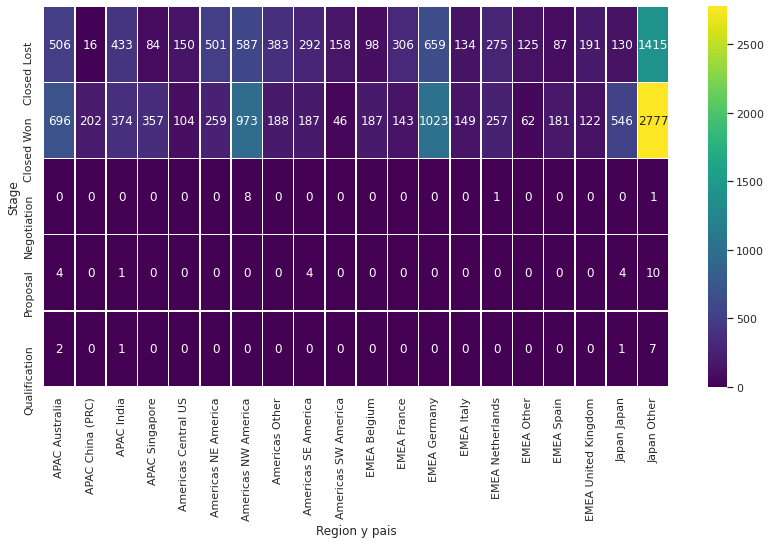

In [29]:
#pais/region con mas ventas
dataset.loc[dataset['Territory'] == 'None', 'Territory'] = 'Other'

dataset['Region y pais'] = dataset['Region'] + ' ' + dataset['Territory'] 
lista_top_paises = dataset['Region y pais'].value_counts().head(20).index.tolist()

top_paises = dataset[dataset['Region y pais'].isin(lista_top_paises)]

top_paises = top_paises.groupby(['Region y pais', 'Stage']).agg({'count' : 'count'}).reset_index()
pivoted_top_paises = top_paises.pivot("Stage", "Region y pais", "count").fillna(0).astype(int)
f, ax = mplt.subplots(figsize=(14, 7))
sns.heatmap(pivoted_top_paises, annot=True, fmt="d",cmap='viridis', linewidths=.5, ax=ax)

In [30]:
top_paises[top_paises['Stage'] == 'Closed Won'].nlargest(10, 'count')

,Region y pais,Stage,count
48,Japan Other,Closed Won,2777
31,EMEA Germany,Closed Won,1023
17,Americas NW America,Closed Won,973
1,APAC Australia,Closed Won,696
44,Japan Japan,Closed Won,546
7,APAC India,Closed Won,374
11,APAC Singapore,Closed Won,357
15,Americas NE America,Closed Won,259
35,EMEA Netherlands,Closed Won,257
5,APAC China (PRC),Closed Won,202


In [31]:
#clientes con mas ventas por quarter
top_clientes_periodo = dataset.groupby(['Opportunity_Owner','Delivery_Quarter', 'Delivery_Year', 'Stage']).agg({'count' : 'count'}).reset_index()
top_clientes_periodo[top_clientes_periodo['Stage'] == 'Closed Won'].nlargest(10, 'count')

,Opportunity_Owner,Delivery_Quarter,Delivery_Year,Stage,count
572,Person_Name_50,Q4,2017,Closed Won,453
556,Person_Name_50,Q2,2017,Closed Won,271
558,Person_Name_50,Q2,2018,Closed Won,266
548,Person_Name_50,Q1,2017,Closed Won,260
565,Person_Name_50,Q3,2017,Closed Won,253
570,Person_Name_50,Q4,2016,Closed Won,238
546,Person_Name_50,Q1,2016,Closed Won,180
554,Person_Name_50,Q2,2016,Closed Won,177
563,Person_Name_50,Q3,2016,Closed Won,156
39,Person_Name_13,Q2,2017,Closed Won,138


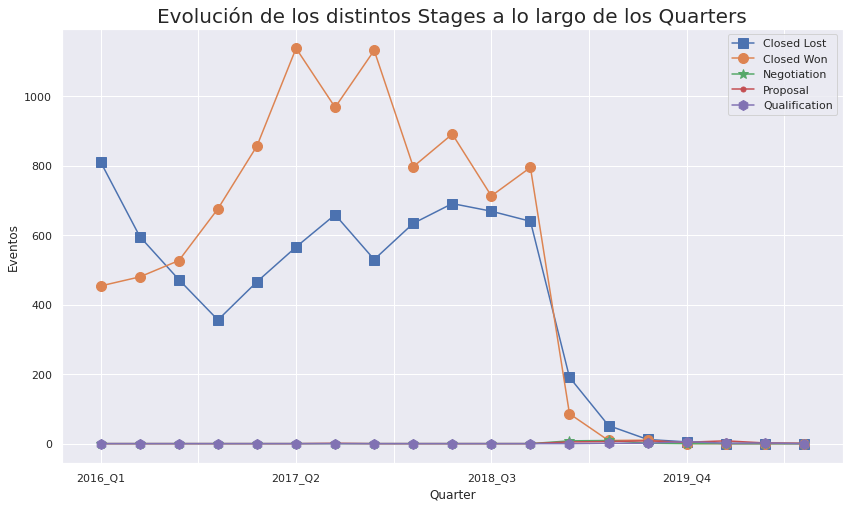

In [32]:
dataset['Delivery_Period'] =dataset['Delivery_Year'].astype(str) + '_' + dataset['Delivery_Quarter'] 
#dataset['Delivery_Period'].value_counts()
#dataset['Ocurrencias'] = 1
tabla=dataset[['Delivery_Period','count','Stage']].groupby(['Delivery_Period','Stage']).count()
tabla = tabla.unstack().fillna(0)

grafico=tabla.plot(figsize=(14, 8),ms=10.0, label='')
#disenio del grafico.
linea_graficos=grafico.get_lines()
linea_graficos[0].set_marker('s')
linea_graficos[1].set_marker('o')
linea_graficos[2].set_marker('*')
linea_graficos[3].set_marker('.')
linea_graficos[4].set_marker('h')
#linea_graficos[5].set_marker('D')
#linea_graficos[6].set_marker('v')
L=mplt.legend()
mplt.ylabel('Eventos')
mplt.xlabel('Quarter')
mplt.title("Evolución de los distintos Stages a lo largo de los Quarters",fontsize=20)
L.get_texts()[0].set_text('Closed Lost')
L.get_texts()[1].set_text('Closed Won')
L.get_texts()[2].set_text('Negotiation')
L.get_texts()[3].set_text('Proposal')
L.get_texts()[4].set_text('Qualification')
left, right =grafico.get_xlim();
grafico.set_xlim(left-0.1,right+0.1)
mplt.savefig('clicks_publicistas_y_dias.png', bbox_inches = 'tight')

In [33]:
tabla.head

<bound method NDFrame.head of                       count                                              
Stage           Closed Lost Closed Won Negotiation Proposal Qualification
Delivery_Period                                                          
2016_Q1               810.0      454.0         0.0      0.0           0.0
2016_Q2               596.0      480.0         0.0      0.0           0.0
2016_Q3               472.0      527.0         0.0      0.0           0.0
2016_Q4               356.0      676.0         0.0      0.0           0.0
2017_Q1               466.0      857.0         0.0      0.0           0.0
2017_Q2               566.0     1138.0         0.0      0.0           0.0
2017_Q3               659.0      968.0         0.0      1.0           0.0
2017_Q4               530.0     1132.0         0.0      0.0           0.0
2018_Q1               634.0      797.0         0.0      0.0           0.0
2018_Q2               691.0      891.0         0.0      0.0           0.0
2018_Q3 

In [34]:
#clientes con mayor cantidad de ventas peridas
top_clientes_periodo[top_clientes_periodo['Stage'] == 'Closed Lost'].nlargest(10, 'count')

,Opportunity_Owner,Delivery_Quarter,Delivery_Year,Stage,count
545,Person_Name_50,Q1,2016,Closed Lost,621
553,Person_Name_50,Q2,2016,Closed Lost,292
562,Person_Name_50,Q3,2016,Closed Lost,187
406,Person_Name_43,Q2,2018,Closed Lost,109
838,Person_Name_8,Q3,2017,Closed Lost,105
400,Person_Name_43,Q1,2018,Closed Lost,92
216,Person_Name_3,Q1,2017,Closed Lost,86
412,Person_Name_43,Q3,2018,Closed Lost,79
232,Person_Name_3,Q3,2017,Closed Lost,74
832,Person_Name_8,Q2,2018,Closed Lost,68


In [35]:
#clientes nuevos vs clientes viejos
dataset['Tiempo_Desde_Creacion_De_Cuenta'] = dataset['Opportunity_Created_Date'] - dataset['Account_Created_Date']


dataset['Tiempo_Desde_Creacion_De_Cuenta'].value_counts()

tiempo_negativo = dataset[dataset['Tiempo_Desde_Creacion_De_Cuenta'].dt.days< 0]
tiempo_negativo['Stage'].value_counts()


Closed Won     63
Closed Lost    47
Name: Stage, dtype: int64

In [36]:
tiempo_desde_creacion = dataset.groupby(['Tiempo_Desde_Creacion_De_Cuenta', 'Stage']).agg({'count' : 'count'}).reset_index()

In [37]:
tiempo_desde_creacion.head()

,Tiempo_Desde_Creacion_De_Cuenta,Stage,count
0,-490 days,Closed Won,4
1,-472 days,Closed Won,1
2,-329 days,Closed Lost,1
3,-304 days,Closed Lost,1
4,-278 days,Closed Lost,1


In [38]:
dataset['tiempo_hasta_entrega'] = dataset['Planned_Delivery_End_Date'] - dataset['Opportunity_Created_Date']
dataset['tiempo_esperado_entrega'] = (dataset['Planned_Delivery_End_Date'] - dataset['Planned_Delivery_Start_Date'])/np.timedelta64(1, 'D')
#dataset['tiempo_esperado_entrega'] = dataset['tiempo_esperado_entrega']
dataset_tiempo = dataset.loc[dataset['tiempo_esperado_entrega'].notna()]
dataset_tiempo.loc[ : ,'tiempo_esperado_entrega']= dataset_tiempo.loc[:, 'tiempo_esperado_entrega'].astype(int)
dataset_tiempo.head()
#f, ax = mplt.subplots(figsize=(14, 7))
#sns.violinplot(x="Stage", y="tiempo_esperado_entrega", data=dataset_tiempo)

/home/lucas/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,...,Total_Taxable_Amount,Stage,conversion,conversion_diaria,count,Region y pais,Delivery_Period,Tiempo_Desde_Creacion_De_Cuenta,tiempo_hasta_entrega,tiempo_esperado_entrega
0,27761,EMEA,Other,1,1,1,1,Bureaucratic_Code_4,2015-06-16,None,...,5272800.0,Closed Lost,1.131096,1.131095,1,EMEA Other,2016_Q2,174 days,206 days,60
1,27760,EMEA,Other,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,...,48230.0,Closed Won,1.131094,1.131095,1,EMEA Other,2016_Q1,174 days,44 days,2
2,27446,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,...,83865.6,Closed Won,1.000000,1.000000,1,Americas NW America,2016_Q1,231 days,48 days,0
3,16808,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,7421881.5,Closed Lost,1.000000,1.000000,1,Americas NW America,2018_Q1,864 days,844 days,58
4,16805,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,...,13357192.5,Closed Lost,1.000000,1.000000,1,Americas NW America,2018_Q1,864 days,813 days,27


Text(0.5, 1.0, 'Diferencia entre fechas fecha maxima y minima de llegada de los distintos stages')

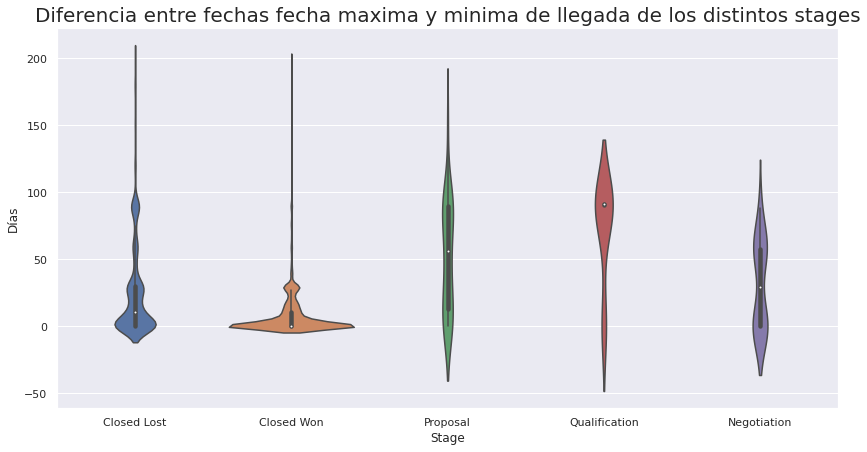

In [39]:
#filtramos algunos datos previos para visualizar
dataset_tiempo = dataset_tiempo.loc[dataset_tiempo['tiempo_esperado_entrega'] < 200]
f, ax = mplt.subplots(figsize=(14, 7))
violin_plot = sns.violinplot(x="Stage", y="tiempo_esperado_entrega", data=dataset_tiempo)
violin_plot.set_ylabel("Días",fontsize=12)
violin_plot.set_title("Diferencia entre fechas fecha maxima y minima de llegada de los distintos stages",fontsize=20)

In [40]:
tiempo_hasta_adquicicion = dataset.groupby(['tiempo_hasta_entrega', 'Stage']).agg({'count' : 'count'}).reset_index()

In [41]:
tiempo_hasta_adquicicion

,tiempo_hasta_entrega,Stage,count
0,-267 days,Closed Won,1
1,-256 days,Closed Won,2
2,-227 days,Closed Won,2
3,-196 days,Closed Won,2
4,-184 days,Closed Won,1
...,...,...,...
1065,1186 days,Closed Won,1
1066,1304 days,Closed Lost,1
1067,1507 days,Closed Lost,1
1068,1812 days,Closed Lost,1


In [42]:
lista_top_product = dataset['Product_Name'].value_counts().head(20).index.tolist()
lista_top_product

['Product_Name_100',
 'Product_Name_226',
 'Product_Name_231',
 'Product_Name_491',
 'Product_Name_4',
 'Product_Name_192',
 'Product_Name_111',
 'Product_Name_132',
 'Product_Name_495',
 'Product_Name_29',
 'Product_Name_148',
 'Product_Name_452',
 'Product_Name_167',
 'Product_Name_241',
 'Product_Name_220',
 'Product_Name_209',
 'Product_Name_20',
 'Product_Name_181',
 'Product_Name_439',
 'Product_Name_214']

<AxesSubplot:title={'center':'Productos con más consultados por Stages'}, xlabel='Product_Name', ylabel='Stage'>

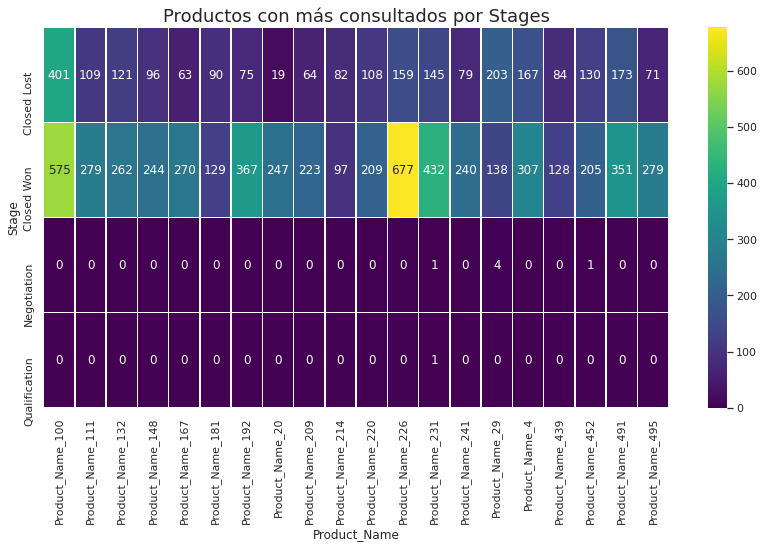

In [43]:
top_products = dataset[dataset['Product_Name'].isin(lista_top_product)]

#product_Dataset = product_Dataset[ (product_Dataset['Product_Type'] !='None')]
top_products = top_products.groupby(['Product_Name', 'Stage']).agg({'count' : 'count'}).reset_index()
pivoted_top_products = top_products.pivot("Stage", "Product_Name", "count").fillna(0).astype(int)
f, ax = mplt.subplots(figsize=(14, 7))
title="Productos con más consultados por Stages"
mplt.title(title,fontsize=18)
sns.heatmap(pivoted_top_products, annot=True, fmt="d",cmap='viridis', linewidths=.5, ax=ax)
#product_Dataset.nlargest(10, 'count')

Text(0.5, 1.0, 'Cantidad de oportunidades por Quarters y Stages')

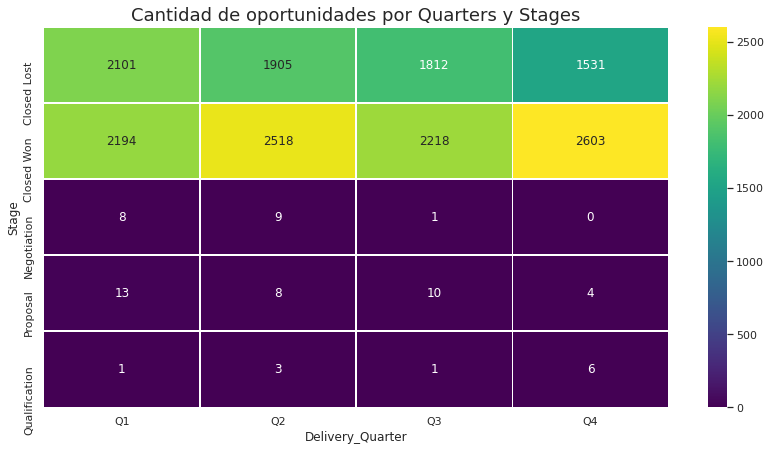

In [44]:
top_quarters = dataset.groupby(['Delivery_Quarter', 'Stage']).agg({'count' : 'count'}).reset_index()
pivoted_top_quarters = top_quarters.pivot("Stage", "Delivery_Quarter", "count").fillna(0).astype(int)
f, ax = mplt.subplots(figsize=(14, 7))
sns.heatmap(pivoted_top_quarters, annot=True, fmt="d",cmap='viridis', linewidths=.5, ax=ax)
title="Cantidad de oportunidades por Quarters y Stages"
mplt.title(title,fontsize=18)
#product_Dataset.nlargest(10, 'count')

In [45]:
dataset_wins = dataset[dataset['Stage'] == 'Closed Won']
dataset_lost = dataset[dataset['Stage'] == 'Closed Lost']

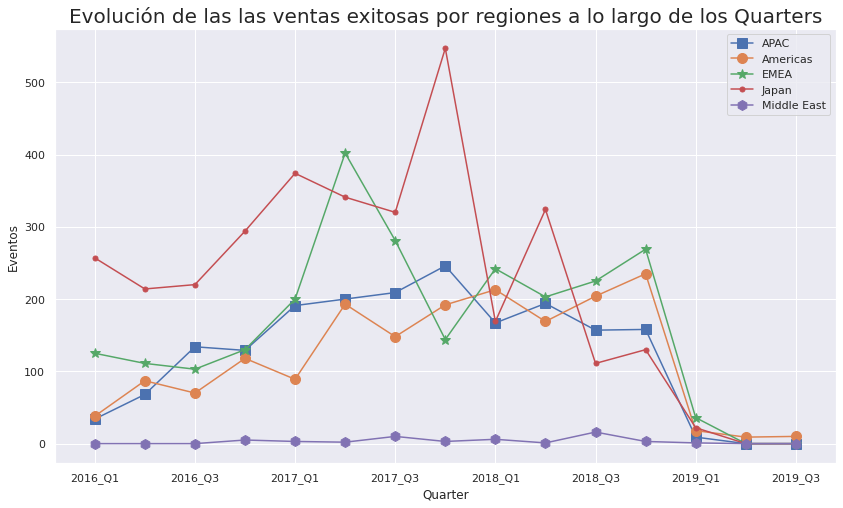

In [46]:
tabla=dataset_wins[['Delivery_Period','count','Region']].groupby(['Delivery_Period','Region']).agg({'count': 'count'})
tabla = tabla.unstack().fillna(0)

grafico=tabla.plot(figsize=(14, 8),ms=10.0, label='')
#disenio del grafico.
linea_graficos=grafico.get_lines()
linea_graficos[0].set_marker('s')
linea_graficos[1].set_marker('o')
linea_graficos[2].set_marker('*')
linea_graficos[3].set_marker('.')
linea_graficos[4].set_marker('h')
#linea_graficos[5].set_marker('D')
#linea_graficos[6].set_marker('v')
L=mplt.legend()
mplt.ylabel('Eventos')
mplt.xlabel('Quarter')
mplt.title("Evolución de las las ventas exitosas por regiones a lo largo de los Quarters",fontsize=20)
L.get_texts()[0].set_text('APAC')
L.get_texts()[1].set_text('Americas')
L.get_texts()[2].set_text('EMEA')
L.get_texts()[3].set_text('Japan')
L.get_texts()[4].set_text('Middle East')
left, right =grafico.get_xlim();
grafico.set_xlim(left-0.1,right+0.1)
mplt.savefig('clicks_publicistas_y_dias.png', bbox_inches = 'tight')

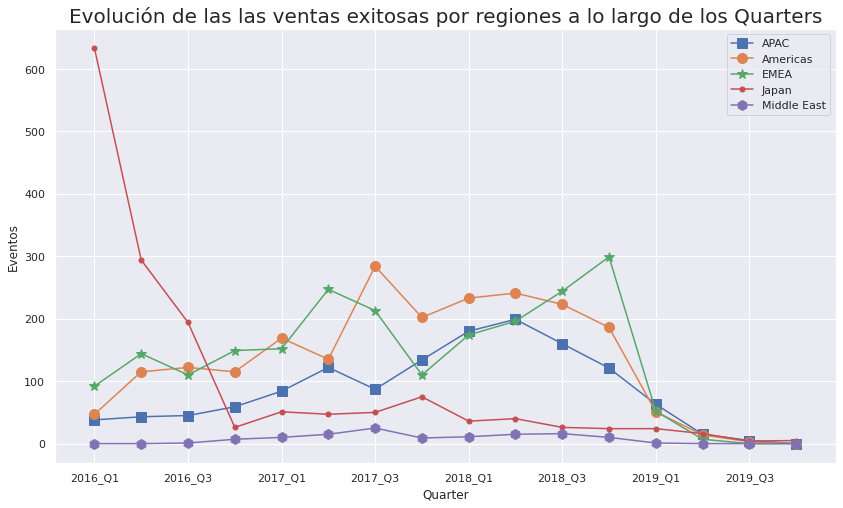

In [47]:
tabla=dataset_lost[['Delivery_Period','count','Region']].groupby(['Delivery_Period','Region']).agg({'count': 'count'})
tabla = tabla.unstack().fillna(0)

grafico=tabla.plot(figsize=(14, 8),ms=10.0, label='')
#disenio del grafico.
linea_graficos=grafico.get_lines()
linea_graficos[0].set_marker('s')
linea_graficos[1].set_marker('o')
linea_graficos[2].set_marker('*')
linea_graficos[3].set_marker('.')
linea_graficos[4].set_marker('h')
#linea_graficos[5].set_marker('D')
#linea_graficos[6].set_marker('v')
L=mplt.legend()
mplt.ylabel('Eventos')
mplt.xlabel('Quarter')
mplt.title("Evolución de las las ventas exitosas por regiones a lo largo de los Quarters",fontsize=20)
L.get_texts()[0].set_text('APAC')
L.get_texts()[1].set_text('Americas')
L.get_texts()[2].set_text('EMEA')
L.get_texts()[3].set_text('Japan')
L.get_texts()[4].set_text('Middle East')
left, right =grafico.get_xlim();
grafico.set_xlim(left-0.1,right+0.1)
mplt.savefig('clicks_publicistas_y_dias.png', bbox_inches = 'tight')

In [48]:
tabla=dataset_lost[['Delivery_Period','count','Region']].groupby(['Delivery_Period','Region']).agg({'count': 'count'})
tabla = tabla.unstack().fillna(0)

In [49]:
tabla = dataset_wins[['Delivery_Period','count','Region']].pivot_table(values = 'count',columns= 'Region', index= 'Delivery_Period', aggfunc=np.sum).reset_index()
tabla.columns =['Delivery_Period', 'APAC', 'Americas', 'EMEA', 'Japan', 'Middle East']
tabla = tabla.fillna(0)
tabla

,Delivery_Period,APAC,Americas,EMEA,Japan,Middle East
0,2016_Q1,34.0,38.0,125.0,257.0,0.0
1,2016_Q2,68.0,87.0,111.0,214.0,0.0
2,2016_Q3,134.0,70.0,103.0,220.0,0.0
3,2016_Q4,129.0,118.0,130.0,294.0,5.0
4,2017_Q1,191.0,89.0,200.0,374.0,3.0
5,2017_Q2,200.0,193.0,402.0,341.0,2.0
6,2017_Q3,209.0,148.0,281.0,320.0,10.0
7,2017_Q4,246.0,192.0,144.0,547.0,3.0
8,2018_Q1,167.0,213.0,242.0,169.0,6.0
9,2018_Q2,194.0,169.0,203.0,324.0,1.0


In [50]:
tabla=dataset[['Delivery_Period','count','Stage']].pivot_table(values = 'count',columns= 'Stage', index= 'Delivery_Period', aggfunc=np.sum).reset_index(level = 0)
tabla = tabla.fillna(0)
tabla.columns = ['Delivery_Period', 'Closed Lost', 'Closed Won', 'Negotiation','Proposal', 'Qualification']
#tabla.set_index('Delivery_Period')
data_perc = tabla.loc[:,['Closed Lost', 'Closed Won', 'Negotiation','Proposal', 'Qualification']].divide(tabla.drop(columns = ['Delivery_Period']).sum(axis=1), axis=0)
data_perc

,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
0,0.640823,0.359177,0.000000,0.000000,0.000000
1,0.553903,0.446097,0.000000,0.000000,0.000000
2,0.472472,0.527528,0.000000,0.000000,0.000000
3,0.344961,0.655039,0.000000,0.000000,0.000000
4,0.352230,0.647770,0.000000,0.000000,0.000000
5,0.332160,0.667840,0.000000,0.000000,0.000000
6,0.404791,0.594595,0.000000,0.000614,0.000000
7,0.318893,0.681107,0.000000,0.000000,0.000000
8,0.443047,0.556953,0.000000,0.000000,0.000000
9,0.436789,0.563211,0.000000,0.000000,0.000000


(-0.95, 15.95)

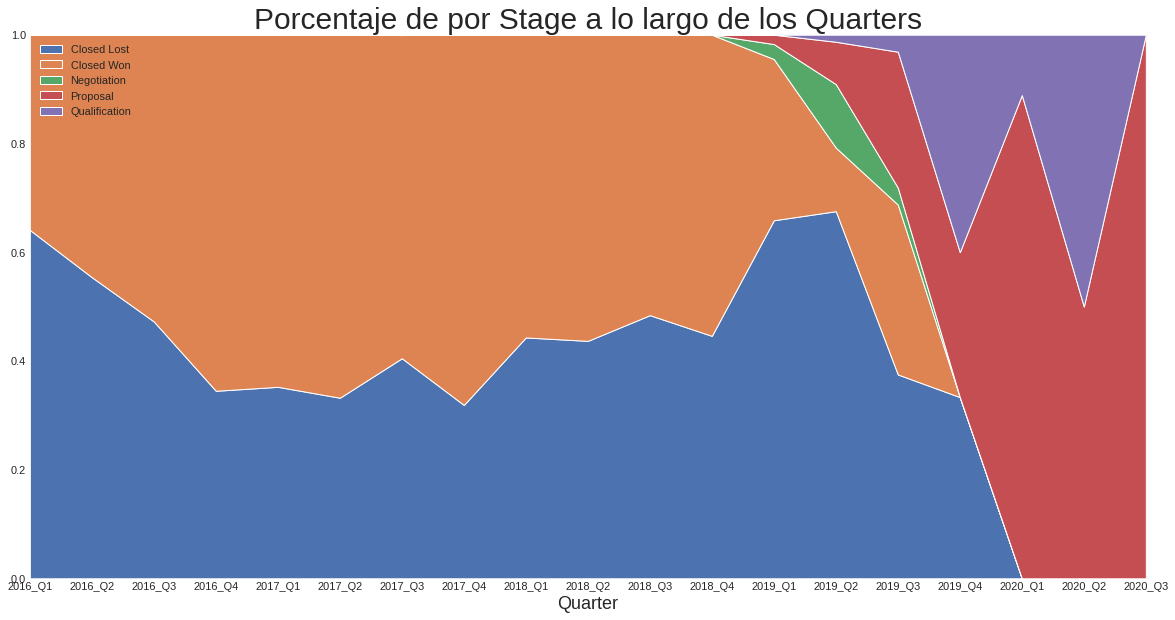

In [51]:
mplt.figure(figsize=(20,10))
mplt.style.use('seaborn-darkgrid')
mplt.stackplot(tabla['Delivery_Period'],  data_perc["Closed Lost"],  data_perc["Closed Won"],  data_perc["Negotiation"],data_perc["Proposal"],data_perc["Qualification"], labels=['Closed Lost', 'Closed Won','Negotiation','Proposal', 'Qualification'])
mplt.legend(loc='upper left')
mplt.margins(0,0)
mplt.title('Porcentaje de por Stage a lo largo de los Quarters',fontsize=30)


linea_graficos=grafico.get_lines()
linea_graficos[0].set_marker('s')
linea_graficos[1].set_marker('o')
linea_graficos[2].set_marker('*')
linea_graficos[3].set_marker('.')
linea_graficos[4].set_marker('h')

#fig.suptitle('test title', fontsize=20)
mplt.xlabel('Quarter', fontsize=18)
mplt.rc('axes', labelsize=20)
#mplt.axes(['2016_Q1',2017_Q1',1,1])
left, right =grafico.get_xlim();
grafico.set_xlim(left-0.1,right+0.1)
#set(gca,'FontSize',16)


In [52]:
lista_top_Account_Owner_win = dataset_wins['Account_Owner'].value_counts().head(20).index.tolist()

top_Account_Owner = dataset_wins[dataset_wins['Account_Owner'].isin(lista_top_Account_Owner_win)]
top_Account_Owner

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,...,Total_Taxable_Amount,Stage,conversion,conversion_diaria,count,Region y pais,Delivery_Period,Tiempo_Desde_Creacion_De_Cuenta,tiempo_hasta_entrega,tiempo_esperado_entrega
2,27446,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,...,83865.60,Closed Won,1.000000,1.000000,1,Americas NW America,2016_Q1,231 days,48 days,0.0
7,27455,Americas,NW America,1,1,1,1,Bureaucratic_Code_4,2015-04-21,Source_7,...,50688.00,Closed Won,1.000000,1.000000,1,Americas NW America,2016_Q1,232 days,47 days,0.0
63,13392,EMEA,Germany,0,0,0,0,Bureaucratic_Code_4,2013-07-27,Source_7,...,103350.00,Closed Won,1.131094,1.131093,1,EMEA Germany,2016_Q1,865 days,51 days,11.0
64,19342,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,2013-08-22,None,...,3184974.00,Closed Won,1.000000,1.000000,1,Americas NW America,2016_Q1,840 days,112 days,30.0
65,24444,Japan,Other,1,1,0,0,Bureaucratic_Code_4,2015-04-20,None,...,243360.00,Closed Won,0.008990,0.008990,1,Japan Other,2016_Q1,234 days,29 days,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16937,17683,EMEA,Germany,0,0,0,0,Bureaucratic_Code_4,2013-07-27,Source_9,...,528918.75,Closed Won,1.131094,1.131093,1,EMEA Germany,2016_Q1,860 days,87 days,28.0
16939,18324,EMEA,Norway,1,1,0,0,Bureaucratic_Code_4,2013-07-27,Source_9,...,401700.00,Closed Won,1.131087,1.131093,1,EMEA Norway,2016_Q2,860 days,139 days,20.0
16942,8781,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,...,299715.00,Closed Won,1.131096,1.131093,1,EMEA Austria,2016_Q1,-42 days,112 days,4.0
16943,8786,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,...,299715.00,Closed Won,1.131096,1.131093,1,EMEA Austria,2016_Q2,-42 days,126 days,4.0


<AxesSubplot:title={'center':'Mejores vendedores por regiones'}, xlabel='Account_Owner', ylabel='Region'>

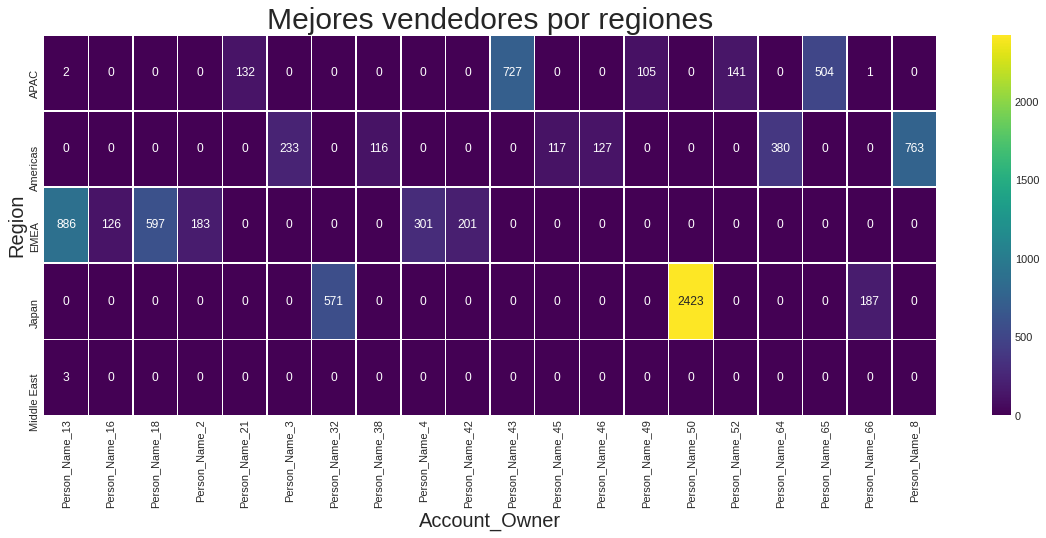

In [53]:
tabla = top_Account_Owner[['Region','Account_Owner','count']].groupby(['Region','Account_Owner']).agg({'count': 'count'}).reset_index()
#tabla.columns =['Delivery_Period', 'APAC', 'Americas', 'EMEA', 'Japan', 'Middle East']
#tabla = tabla.fillna(0)
#tabla.columns = 
tabla

tabla_pivot = tabla.pivot("Region", "Account_Owner", "count")
tabla_pivot = tabla_pivot.fillna(0)
tabla_pivot = tabla_pivot.astype(int)
# Draw a heatmap with the numeric values in each cell
f, ax = mplt.subplots(figsize=(20, 7))
mplt.title('Mejores vendedores por regiones',fontsize=30)
sns.heatmap(tabla_pivot, annot=True, fmt="d",cmap='viridis', linewidths=.5, ax=ax)
#tabla_pivot

In [54]:
dataset['Opportunity_Type'].value_counts()

Opportunity_Type_1     6819
Opportunity_Type_7     5763
Opportunity_Type_19    1900
Opportunity_Type_8     1458
Opportunity_Type_12     279
Opportunity_Type_3      275
Opportunity_Type_20     174
Opportunity_Type_2       70
Opportunity_Type_4       51
Opportunity_Type_10      34
Opportunity_Type_9       23
Opportunity_Type_14      15
Opportunity_Type_5       14
Opportunity_Type_18      11
Opportunity_Type_22      10
Opportunity_Type_15       9
Opportunity_Type_17       8
Opportunity_Type_0        8
Opportunity_Type_21       6
Opportunity_Type_23       5
Opportunity_Type_13       4
Opportunity_Type_16       4
Opportunity_Type_11       3
Opportunity_Type_6        2
Opportunity_Type_24       1
Name: Opportunity_Type, dtype: int64

<AxesSubplot:title={'center':'Oportunidades mas frecuentes por Stage'}, xlabel='Opportunity_Type', ylabel='Stage'>

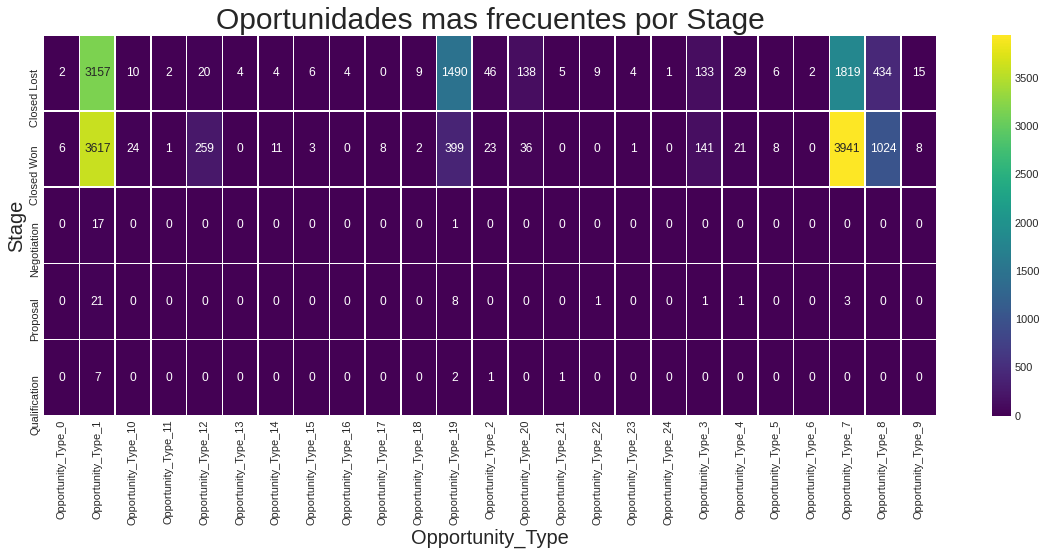

In [55]:
tabla = dataset[['Stage','Opportunity_Type','count']].groupby(['Stage','Opportunity_Type']).agg({'count': 'count'}).reset_index()
tabla_pivot = tabla.pivot("Stage", "Opportunity_Type", "count")
tabla_pivot = tabla_pivot.fillna(0)
tabla_pivot = tabla_pivot.astype(int)
# Draw a heatmap with the numeric values in each cell
f, ax = mplt.subplots(figsize=(20, 7))
mplt.title('Oportunidades mas frecuentes por Stage',fontsize=30)
sns.heatmap(tabla_pivot, annot=True, fmt="d",cmap='viridis', linewidths=.5, ax=ax)

In [56]:
dataset['Pricing, Delivery_Terms_Quote_Appr'].value_counts()

1    13692
0     3254
Name: Pricing, Delivery_Terms_Quote_Appr, dtype: int64

In [57]:
top_products

,Product_Name,Stage,count
0,Product_Name_100,Closed Lost,401
1,Product_Name_100,Closed Won,575
2,Product_Name_111,Closed Lost,109
3,Product_Name_111,Closed Won,279
4,Product_Name_132,Closed Lost,121
5,Product_Name_132,Closed Won,262
6,Product_Name_148,Closed Lost,96
7,Product_Name_148,Closed Won,244
8,Product_Name_167,Closed Lost,63
9,Product_Name_167,Closed Won,270


In [58]:
lista_top_product = dataset['Product_Name'].value_counts().head(20).index.tolist()
top_products = dataset[dataset['Product_Name'].isin(lista_top_product)]
top_products

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,...,Total_Taxable_Amount,Stage,conversion,conversion_diaria,count,Region y pais,Delivery_Period,Tiempo_Desde_Creacion_De_Cuenta,tiempo_hasta_entrega,tiempo_esperado_entrega
1,27760,EMEA,Other,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,...,48230.00,Closed Won,1.131094,1.131095,1,EMEA Other,2016_Q1,174 days,44 days,2.0
9,24355,Japan,Other,1,0,0,0,Bureaucratic_Code_5,2015-04-20,None,...,470400.00,Closed Lost,0.008990,0.008990,1,Japan Other,2016_Q1,233 days,82 days,0.0
10,24356,Japan,Other,1,0,0,0,Bureaucratic_Code_5,2015-04-20,None,...,470400.00,Closed Lost,0.008990,0.008990,1,Japan Other,2016_Q1,233 days,82 days,0.0
12,24358,Japan,Other,1,0,0,0,Bureaucratic_Code_5,2015-04-20,None,...,470400.00,Closed Lost,0.008990,0.008990,1,Japan Other,2016_Q1,233 days,82 days,0.0
14,24422,Japan,Other,1,0,0,0,Bureaucratic_Code_5,2015-04-20,None,...,559320.00,Closed Lost,0.008990,0.008990,1,Japan Other,2016_Q1,233 days,82 days,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16934,15853,EMEA,Germany,0,0,0,0,Bureaucratic_Code_4,2013-07-27,None,...,112510.00,Closed Won,1.131093,1.131093,1,EMEA Germany,2016_Q1,860 days,84 days,25.0
16935,17677,EMEA,Germany,0,0,0,0,Bureaucratic_Code_4,2013-07-27,Source_9,...,528918.75,Closed Won,1.131097,1.131093,1,EMEA Germany,2016_Q1,860 days,87 days,28.0
16942,8781,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,...,299715.00,Closed Won,1.131096,1.131093,1,EMEA Austria,2016_Q1,-42 days,112 days,4.0
16943,8786,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,...,299715.00,Closed Won,1.131096,1.131093,1,EMEA Austria,2016_Q2,-42 days,126 days,4.0


Text(0.5, 1.0, 'Cantidad de oportunidades creadas por Quarters y Products')

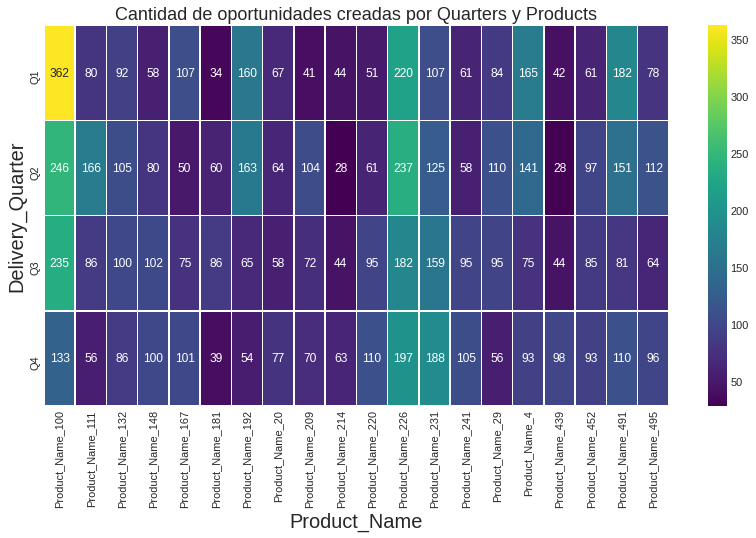

In [59]:
top_quarters_product = top_products.groupby(['Delivery_Quarter', 'Product_Name']).agg({'count' : 'count'}).reset_index()
pivoted_top_quarters = top_quarters_product.pivot("Delivery_Quarter", "Product_Name", "count").fillna(0).astype(int)
f, ax = mplt.subplots(figsize=(14, 7))
sns.heatmap(pivoted_top_quarters, annot=True, fmt="d",cmap='viridis', linewidths=.5, ax=ax)
title="Cantidad de oportunidades creadas por Quarters y Products"
mplt.title(title,fontsize=18)
#product_Dataset.nlargest(10, 'count')

In [60]:
lista_top_product = dataset_wins['Product_Name'].value_counts().head(20).index.tolist()
top_products = dataset_wins[dataset_wins['Product_Name'].isin(lista_top_product)]
top_products

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,...,Total_Taxable_Amount,Stage,conversion,conversion_diaria,count,Region y pais,Delivery_Period,Tiempo_Desde_Creacion_De_Cuenta,tiempo_hasta_entrega,tiempo_esperado_entrega
1,27760,EMEA,Other,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,...,48230.00,Closed Won,1.131094,1.131095,1,EMEA Other,2016_Q1,174 days,44 days,2.0
63,13392,EMEA,Germany,0,0,0,0,Bureaucratic_Code_4,2013-07-27,Source_7,...,103350.00,Closed Won,1.131094,1.131093,1,EMEA Germany,2016_Q1,865 days,51 days,11.0
65,24444,Japan,Other,1,1,0,0,Bureaucratic_Code_4,2015-04-20,None,...,243360.00,Closed Won,0.008990,0.008990,1,Japan Other,2016_Q1,234 days,29 days,0.0
66,18491,EMEA,United Kingdom,0,0,0,0,Bureaucratic_Code_4,2014-01-08,None,...,214500.00,Closed Won,1.131091,1.131090,1,EMEA United Kingdom,2016_Q1,701 days,33 days,4.0
67,18494,EMEA,United Kingdom,0,0,0,0,Bureaucratic_Code_4,2014-01-08,None,...,214500.00,Closed Won,1.131091,1.131090,1,EMEA United Kingdom,2016_Q1,701 days,40 days,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16934,15853,EMEA,Germany,0,0,0,0,Bureaucratic_Code_4,2013-07-27,None,...,112510.00,Closed Won,1.131093,1.131093,1,EMEA Germany,2016_Q1,860 days,84 days,25.0
16935,17677,EMEA,Germany,0,0,0,0,Bureaucratic_Code_4,2013-07-27,Source_9,...,528918.75,Closed Won,1.131097,1.131093,1,EMEA Germany,2016_Q1,860 days,87 days,28.0
16942,8781,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,...,299715.00,Closed Won,1.131096,1.131093,1,EMEA Austria,2016_Q1,-42 days,112 days,4.0
16943,8786,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,...,299715.00,Closed Won,1.131096,1.131093,1,EMEA Austria,2016_Q2,-42 days,126 days,4.0


Text(0.5, 1.0, 'Cantidad de oportunidades ganadas por Quarters y Products')

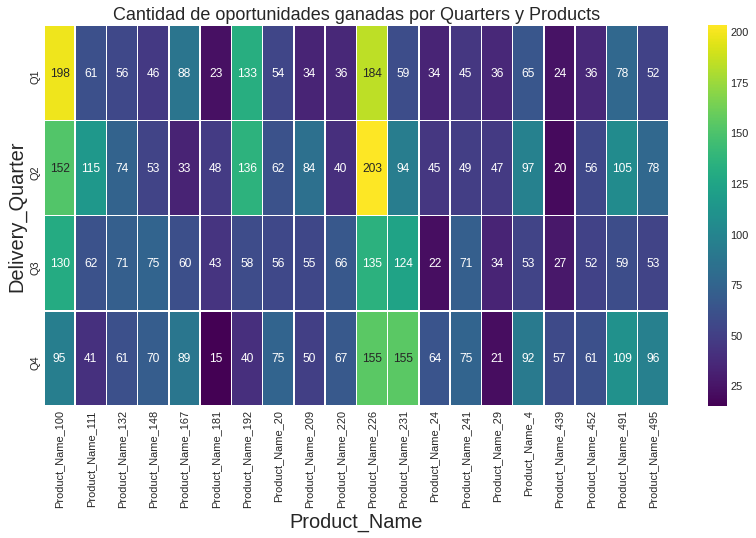

In [61]:
top_quarters_product = top_products.groupby(['Delivery_Quarter', 'Product_Name']).agg({'count' : 'count'}).reset_index()
pivoted_top_quarters = top_quarters_product.pivot("Delivery_Quarter", "Product_Name", "count").fillna(0).astype(int)
f, ax = mplt.subplots(figsize=(14, 7))
sns.heatmap(pivoted_top_quarters, annot=True, fmt="d",cmap='viridis', linewidths=.5, ax=ax)
title="Cantidad de oportunidades ganadas por Quarters y Products"
mplt.title(title,fontsize=18)


In [62]:
dataset['Delivery_Terms'].value_counts()

Delivery_Terms_4    7712
Delivery_Terms_2    4633
Delivery_Terms_1    2936
Delivery_Terms_6     781
Delivery_Terms_5     635
Delivery_Terms_8     164
Delivery_Terms_3      41
Delivery_Terms_7      38
Delivery_Terms_0       6
Name: Delivery_Terms, dtype: int64

<AxesSubplot:title={'center':'Stages de las oportunidades comparado contra delivery terms'}, xlabel='Delivery_Terms', ylabel='Stage'>

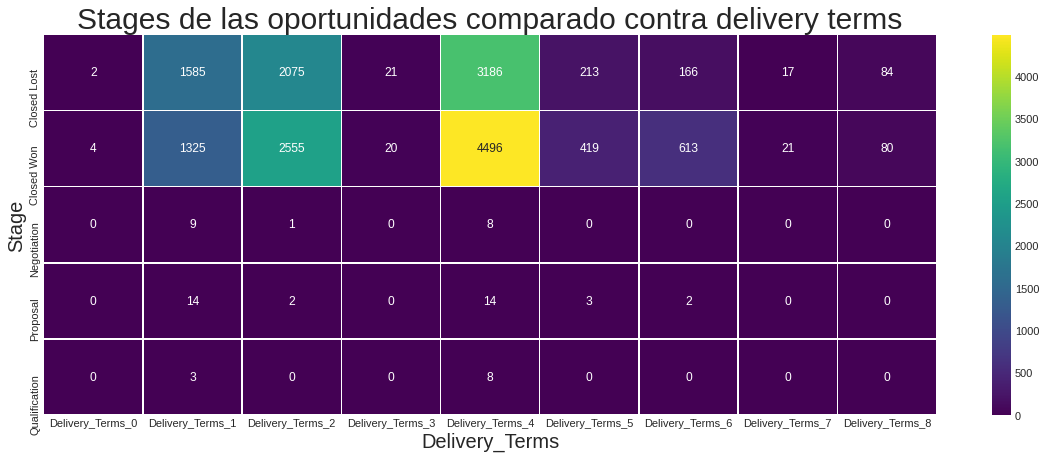

In [63]:
tabla = dataset[['Stage','Delivery_Terms','count']].groupby(['Stage','Delivery_Terms']).agg({'count': 'count'}).reset_index()
#tabla.columns =['Delivery_Period', 'APAC', 'Americas', 'EMEA', 'Japan', 'Middle East']
#tabla = tabla.fillna(0)
#tabla.columns = 
tabla

tabla_pivot = tabla.pivot("Stage", "Delivery_Terms", "count")
tabla_pivot = tabla_pivot.fillna(0)
tabla_pivot = tabla_pivot.astype(int)
# Draw a heatmap with the numeric values in each cell
f, ax = mplt.subplots(figsize=(20, 7))
mplt.title('Stages de las oportunidades comparado contra delivery terms',fontsize=30)
sns.heatmap(tabla_pivot, annot=True, fmt="d",cmap='viridis', linewidths=.5, ax=ax)

<AxesSubplot:title={'center':'delivery terms por Region'}, xlabel='Delivery_Terms', ylabel='Region'>

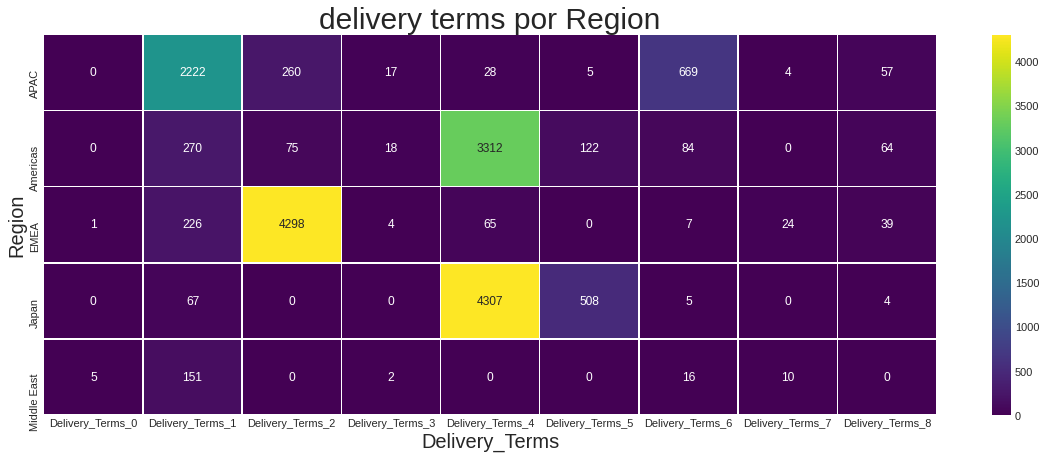

In [64]:
tabla = dataset[['Region','Delivery_Terms','count']].groupby(['Region','Delivery_Terms']).agg({'count': 'count'}).reset_index()
#tabla.columns =['Delivery_Period', 'APAC', 'Americas', 'EMEA', 'Japan', 'Middle East']
#tabla = tabla.fillna(0)
#tabla.columns = 
tabla

tabla_pivot = tabla.pivot("Region", "Delivery_Terms", "count")
tabla_pivot = tabla_pivot.fillna(0)
tabla_pivot = tabla_pivot.astype(int)
# Draw a heatmap with the numeric values in each cell
f, ax = mplt.subplots(figsize=(20, 7))
mplt.title('delivery terms por Region',fontsize=30)
sns.heatmap(tabla_pivot, annot=True, fmt="d",cmap='viridis', linewidths=.5, ax=ax)

In [65]:
dataset['Bureaucratic_Code'].value_counts()

Bureaucratic_Code_4    12587
Bureaucratic_Code_5     3802
Bureaucratic_Code_1      261
Bureaucratic_Code_2      242
Bureaucratic_Code_0       51
Bureaucratic_Code_3        2
Bureaucratic_Code_6        1
Name: Bureaucratic_Code, dtype: int64

<AxesSubplot:title={'center':'Codigos burocraticos comparado contra las regiones'}, xlabel='Bureaucratic_Code', ylabel='Region'>

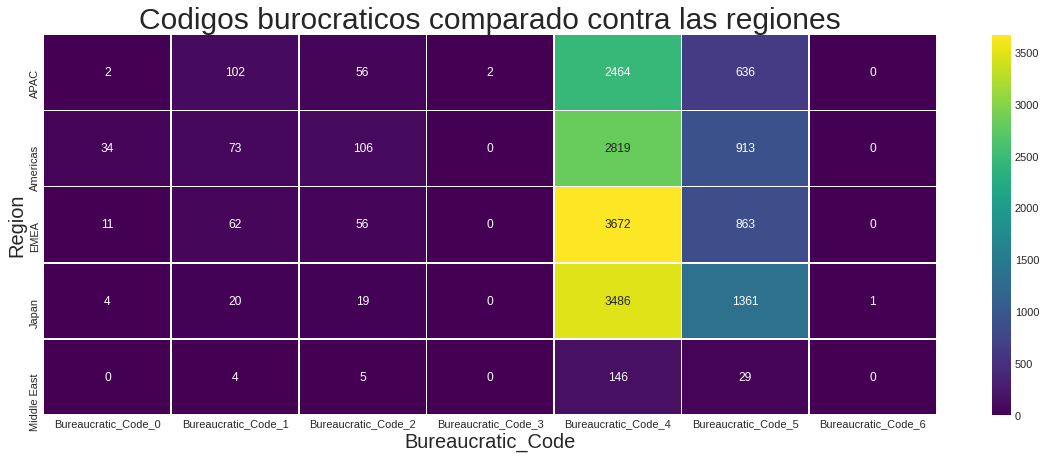

In [66]:
tabla = dataset[['Region','Bureaucratic_Code','count']].groupby(['Region','Bureaucratic_Code']).agg({'count': 'count'}).reset_index()
#tabla.columns =['Delivery_Period', 'APAC', 'Americas', 'EMEA', 'Japan', 'Middle East']
#tabla = tabla.fillna(0)
#tabla.columns = 
tabla

tabla_pivot = tabla.pivot("Region", "Bureaucratic_Code", "count")
tabla_pivot = tabla_pivot.fillna(0)
tabla_pivot = tabla_pivot.astype(int)
# Draw a heatmap with the numeric values in each cell
f, ax = mplt.subplots(figsize=(20, 7))
mplt.title('Codigos burocraticos comparado contra las regiones',fontsize=30)
sns.heatmap(tabla_pivot, annot=True, fmt="d",cmap='viridis', linewidths=.5, ax=ax)

In [67]:
dataset['Sales_Contract_No'].value_counts()

None    6972
108       36
479       36
2575      18
3878      16
        ... 
2923       1
1623       1
3230       1
38         1
101        1
Name: Sales_Contract_No, Length: 5267, dtype: int64

In [68]:
dataset['Stage'].value_counts()

Closed Won       9533
Closed Lost      7349
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

In [69]:
dataset[dataset['Sales_Contract_No']== '3201']['ASP_(converted)'].value_counts()

0.17    4
0.18    2
0.25    1
Name: ASP_(converted), dtype: int64

In [70]:
dataset['Total_Amount'].nlargest(10)

16682    315000081.9
16616    256201545.6
2179     244587707.2
7364     158738214.0
3667     153978825.0
2806     123750059.4
16317    102399897.6
16408     96001920.0
16409     96001920.0
2298      94499905.5
Name: Total_Amount, dtype: float64

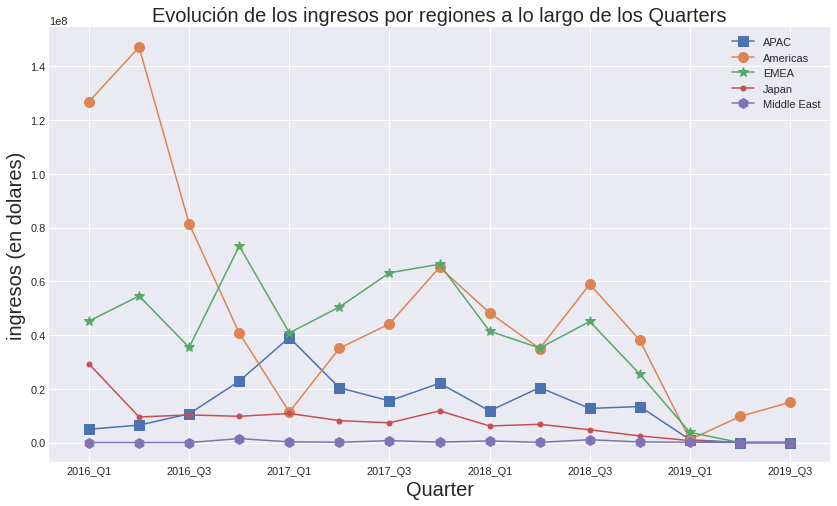

In [71]:
tabla=dataset_wins[['Delivery_Period','Total_Amount','Region']].groupby(['Delivery_Period','Region']).agg({'Total_Amount': 'sum'})
tabla = tabla.unstack().fillna(0)
grafico=tabla.plot(figsize=(14, 8),ms=10.0, label='')
#disenio del grafico.
linea_graficos=grafico.get_lines()
linea_graficos[0].set_marker('s')
linea_graficos[1].set_marker('o')
linea_graficos[2].set_marker('*')
linea_graficos[3].set_marker('.')
linea_graficos[4].set_marker('h')
#linea_graficos[5].set_marker('D')
#linea_graficos[6].set_marker('v')
L=mplt.legend()
mplt.ylabel('ingresos (en dolares)')
mplt.xlabel('Quarter')
mplt.title("Evolución de los ingresos por regiones a lo largo de los Quarters",fontsize=20)
L.get_texts()[0].set_text('APAC')
L.get_texts()[1].set_text('Americas')
L.get_texts()[2].set_text('EMEA')
L.get_texts()[3].set_text('Japan')
L.get_texts()[4].set_text('Middle East')
left, right =grafico.get_xlim();
grafico.set_xlim(left-0.1,right+0.1)
mplt.savefig('clicks_publicistas_y_dias.png', bbox_inches = 'tight')

In [72]:
ganancias_por_producto = dataset_wins.groupby('Product_Name').agg({'Total_Amount': 'sum'}).reset_index()
ganancias_por_producto

productos_mas_rentables = ganancias_por_producto.nlargest(10, 'Total_Amount')['Product_Name'].to_list()
productos_mas_rentables

['Product_Name_93',
 'Product_Name_220',
 'Product_Name_99',
 'Product_Name_110',
 'Product_Name_307',
 'Product_Name_226',
 'Product_Name_100',
 'Product_Name_308',
 'Product_Name_286',
 'Product_Name_94']

In [73]:
top_products_ganancias = dataset_wins[dataset_wins['Product_Name'].isin(productos_mas_rentables)]
top_products_ganancias

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,...,Total_Taxable_Amount,Stage,conversion,conversion_diaria,count,Region y pais,Delivery_Period,Tiempo_Desde_Creacion_De_Cuenta,tiempo_hasta_entrega,tiempo_esperado_entrega
1,27760,EMEA,Other,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,...,48230.0,Closed Won,1.131094,1.131095,1,EMEA Other,2016_Q1,174 days,44 days,2.0
63,13392,EMEA,Germany,0,0,0,0,Bureaucratic_Code_4,2013-07-27,Source_7,...,103350.0,Closed Won,1.131094,1.131093,1,EMEA Germany,2016_Q1,865 days,51 days,11.0
64,19342,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,2013-08-22,None,...,3184974.0,Closed Won,1.000000,1.000000,1,Americas NW America,2016_Q1,840 days,112 days,30.0
65,24444,Japan,Other,1,1,0,0,Bureaucratic_Code_4,2015-04-20,None,...,243360.0,Closed Won,0.008990,0.008990,1,Japan Other,2016_Q1,234 days,29 days,0.0
66,18491,EMEA,United Kingdom,0,0,0,0,Bureaucratic_Code_4,2014-01-08,None,...,214500.0,Closed Won,1.131091,1.131090,1,EMEA United Kingdom,2016_Q1,701 days,33 days,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16923,27689,Japan,Other,1,1,0,0,Bureaucratic_Code_4,2015-06-11,Source_3,...,12194000.0,Closed Won,0.008990,0.008990,1,Japan Other,2016_Q1,174 days,44 days,4.0
16925,19062,Japan,Japan,0,0,0,0,Bureaucratic_Code_4,2013-08-11,Source_11,...,17537000.0,Closed Won,0.008990,0.008990,1,Japan Japan,2016_Q1,843 days,86 days,4.0
16927,23920,EMEA,Other,0,0,0,0,Bureaucratic_Code_4,2015-03-30,None,...,107250.0,Closed Won,1.131091,1.131091,1,EMEA Other,2016_Q1,248 days,99 days,10.0
16931,17804,EMEA,United Kingdom,1,1,0,0,Bureaucratic_Code_4,2013-10-29,None,...,2209350.0,Closed Won,1.131087,1.131093,1,EMEA United Kingdom,2016_Q1,766 days,98 days,18.0


<AxesSubplot:title={'center':'Ingreso de los 10 mejores productos por region'}, xlabel='Product_Name', ylabel='Region'>

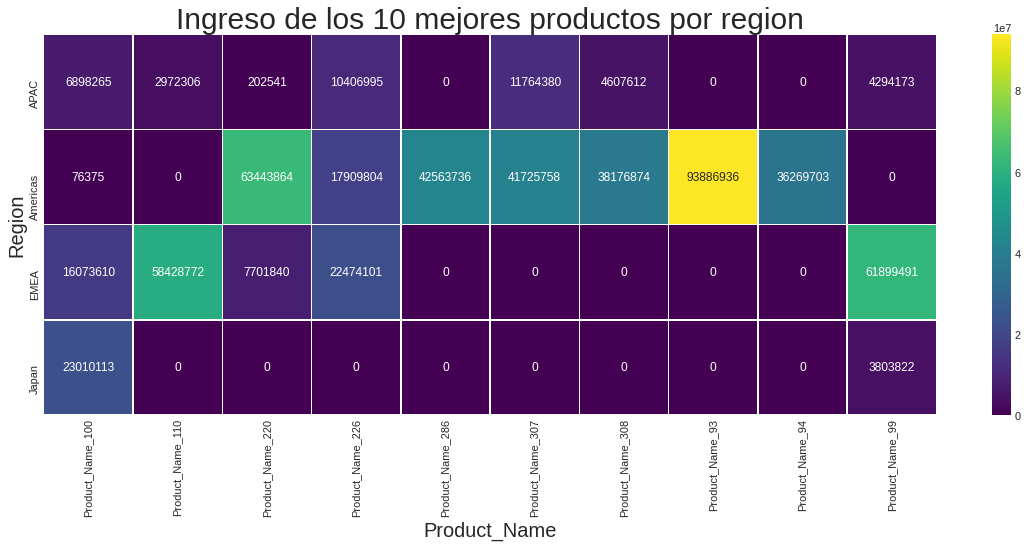

In [74]:
tabla = top_products_ganancias[['Region','Product_Name','Total_Amount']].groupby(['Region','Product_Name']).agg({'Total_Amount': 'sum'}).reset_index()

tabla_pivot = tabla.pivot("Region", "Product_Name", "Total_Amount")
tabla_pivot = tabla_pivot.fillna(0)
tabla_pivot = tabla_pivot.astype(int)
# Draw a heatmap with the numeric values in each cell
f, ax = mplt.subplots(figsize=(20, 7))
mplt.title('Ingreso de los 10 mejores productos por region',fontsize=30)
sns.heatmap(tabla_pivot, annot=True, fmt="d",cmap='viridis', linewidths=.5, ax=ax)

In [75]:
dataset['Pricing, Delivery_Terms_Quote_Appr'].value_counts()

1    13692
0     3254
Name: Pricing, Delivery_Terms_Quote_Appr, dtype: int64

In [76]:
dataset['Opportunity_ID'].value_counts()

2008     36
12460    36
6606     26
5123     26
2911     24
         ..
1337      1
7482      1
5435      1
3400      1
0         1
Name: Opportunity_ID, Length: 9840, dtype: int64

In [77]:
# validacion de oportunities, si 
dataset[dataset['Opportunity_ID']== 5123].head(26) 

dataset['ganado']= dataset['Stage']== 'Closed Won'
dataset['ganado']= dataset['ganado'].astype(int)

In [78]:
dataset.groupby('Opportunity_ID').agg({'ganado':'mean'}).reset_index()['ganado'].value_counts()
#al no haber valores distintos de 0 o 1 puedo asegurar que al menos no hay oportunites donde el stage es parcialmente


1    5072
0    4768
Name: ganado, dtype: int64

In [79]:
dataset['Opportunity_ID'].nunique()

9840

In [80]:
dataset['TRF'].value_counts()

0      11971
1       2192
2        626
3        354
5        297
       ...  
51         1
167        1
163        1
195        1
165        1
Name: TRF, Length: 101, dtype: int64

In [81]:
dataset['Pricing, Delivery_Terms_Approved'].value_counts()

1    9890
0    7056
Name: Pricing, Delivery_Terms_Approved, dtype: int64

In [82]:
dataset[dataset['Pricing, Delivery_Terms_Approved'] == 1]['Stage'].value_counts()

Closed Won     6404
Closed Lost    3443
Proposal         26
Negotiation      17
Name: Stage, dtype: int64

In [83]:
dataset['ASP_(converted)'].isna().value_counts()

False    13737
True      3209
Name: ASP_(converted), dtype: int64

In [84]:
dataset['TRF'].value_counts()


0      11971
1       2192
2        626
3        354
5        297
       ...  
51         1
167        1
163        1
195        1
165        1
Name: TRF, Length: 101, dtype: int64

In [85]:
dataset[(dataset['Total_Amount_Currency']!=dataset['Total_Taxable_Amount_Currency'])]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,...,Stage,conversion,conversion_diaria,count,Region y pais,Delivery_Period,Tiempo_Desde_Creacion_De_Cuenta,tiempo_hasta_entrega,tiempo_esperado_entrega,ganado
1594,9767,EMEA,Other,1,1,0,0,Bureaucratic_Code_4,2017-02-27,None,...,Closed Lost,1.131081,1.131092,1,EMEA Other,2017_Q1,1 days,30 days,3.0,0
2200,27692,Japan,Other,1,1,1,1,Bureaucratic_Code_4,2015-06-11,Source_3,...,Closed Won,1.000000,1.000000,1,Japan Other,2016_Q1,253 days,21 days,10.0,1
3579,17651,EMEA,United Kingdom,1,1,1,1,Bureaucratic_Code_4,2013-10-15,None,...,Closed Lost,1.318055,1.318055,1,EMEA United Kingdom,2016_Q4,996 days,111 days,16.0,0
3683,20106,APAC,Thailand,1,1,0,0,Bureaucratic_Code_4,2013-07-27,Source_7,...,Closed Lost,1.000000,1.000000,1,APAC Thailand,2016_Q3,1081 days,66 days,11.0,0
3940,10870,EMEA,United Kingdom,1,0,1,0,Bureaucratic_Code_5,2016-02-23,Source_11,...,Closed Lost,1.000000,1.000000,1,EMEA United Kingdom,2016_Q3,167 days,65 days,22.0,0
3941,10875,EMEA,United Kingdom,1,0,1,0,Bureaucratic_Code_5,2016-02-23,Source_11,...,Closed Lost,1.000000,1.000000,1,EMEA United Kingdom,2016_Q4,167 days,114 days,35.0,0
3942,10864,EMEA,United Kingdom,1,1,1,1,Bureaucratic_Code_4,2016-02-23,Source_11,...,Closed Lost,1.000000,1.000000,1,EMEA United Kingdom,2016_Q4,167 days,106 days,27.0,0
4805,21902,Japan,Other,1,1,1,1,Bureaucratic_Code_4,2013-09-23,Source_13,...,Closed Won,1.000000,1.000000,1,Japan Other,2016_Q4,1127 days,1 days,0.0,1
5257,11449,EMEA,South America,1,1,1,1,Bureaucratic_Code_4,2016-09-23,Source_7,...,Closed Lost,1.000000,1.000000,1,EMEA South America,2017_Q1,66 days,80 days,23.0,0
5436,23117,APAC,Australia,1,1,1,1,Bureaucratic_Code_4,2014-09-19,Source_9,...,Closed Won,0.707618,0.707610,1,APAC Australia,2016_Q4,810 days,30 days,14.0,1


In [86]:
dataset['Sales_Contract_No'].value_counts()

None    6972
108       36
479       36
2575      18
3878      16
        ... 
2923       1
1623       1
3230       1
38         1
101        1
Name: Sales_Contract_No, Length: 5267, dtype: int64

In [87]:
dataset['Tiene_Contrato']=(dataset['Sales_Contract_No']!= 'None')

In [88]:
tabla_contratos= dataset.groupby(["Tiene_Contrato", "Stage"]).agg({'count':'count'}).reset_index()
tabla_contratos

,Tiene_Contrato,Stage,count
0,False,Closed Lost,6770
1,False,Closed Won,138
2,False,Negotiation,18
3,False,Proposal,35
4,False,Qualification,11
5,True,Closed Lost,579
6,True,Closed Won,9395


<AxesSubplot:title={'center':'Registros con y sin contrato por stage'}, xlabel='Tiene_Contrato', ylabel='count'>

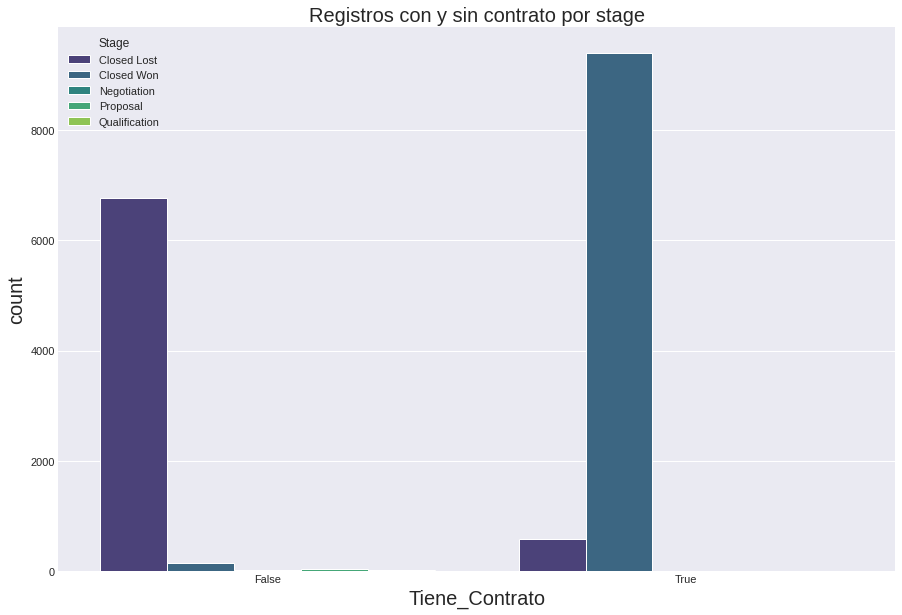

In [89]:
fig, ax =mplt.subplots(figsize=(15,10))

ax=sns.barplot(x="Tiene_Contrato", y='count', hue="Stage",palette="viridis", data=tabla_contratos)
ax.set_title("Registros con y sin contrato por stage",fontsize=20)

ax


In [90]:
dataset_sin_impuesto =dataset[dataset['Total_Taxable_Amount'] == 0]

In [91]:
dataset_sin_impuesto['Stage'].value_counts()

Closed Lost    738
Closed Won     257
Proposal         2
Name: Stage, dtype: int64

In [92]:
dataset['Quote_Expiry_Date'].isna().value_counts()

False    12322
True      4624
Name: Quote_Expiry_Date, dtype: int64

In [93]:
dataset['tiempo_de_proceso'] = (dataset['Last_Modified_Date'] - dataset['Opportunity_Created_Date'])#.days
dataset['tiempo_de_proceso'] = dataset['tiempo_de_proceso'].dt.days

dataset['tiempo_hasta_vencimiento'] = (dataset['Quote_Expiry_Date'] - dataset['Opportunity_Created_Date'])#.days
dataset['tiempo_hasta_vencimiento'] = dataset['tiempo_hasta_vencimiento'].dt.days
dataset['tiempo_de_proceso'].nlargest(10)

16104    1775
16132    1499
16272    1226
16159    1222
16160    1222
16182    1214
16290    1201
16177    1188
16310    1183
16311    1183
Name: tiempo_de_proceso, dtype: int64

In [94]:
#sns.jointplot(x='tiempo_de_proceso', y='tiempo_hasta_vencimiento',data= dataset, kind="hex", color="#4CB391")

In [95]:
dataset['Opportunity_Owner'].value_counts()

Person_Name_50    3780
Person_Name_8     1422
Person_Name_13    1254
Person_Name_18     982
Person_Name_43     838
Person_Name_3      832
Person_Name_4      687
Person_Name_32     686
Person_Name_19     615
Person_Name_64     516
Person_Name_16     446
Person_Name_23     422
Person_Name_46     329
Person_Name_65     322
Person_Name_49     286
Person_Name_48     256
Person_Name_38     254
Person_Name_66     243
Person_Name_44     240
Person_Name_39     211
Person_Name_60     207
Person_Name_62     174
Person_Name_52     173
Person_Name_54     171
Person_Name_5      169
Person_Name_59     134
Person_Name_45     128
Person_Name_2      118
Person_Name_41     113
Person_Name_51     111
Person_Name_55      91
Person_Name_33      87
Person_Name_14      82
Person_Name_11      77
Person_Name_30      69
Person_Name_63      67
Person_Name_40      50
Person_Name_25      49
Person_Name_20      49
Person_Name_22      43
Person_Name_26      33
Person_Name_12      23
Person_Name_37      21
Person_Name

Text(0.5, 1.0, 'Tiempo de proceso de pedidos por region')

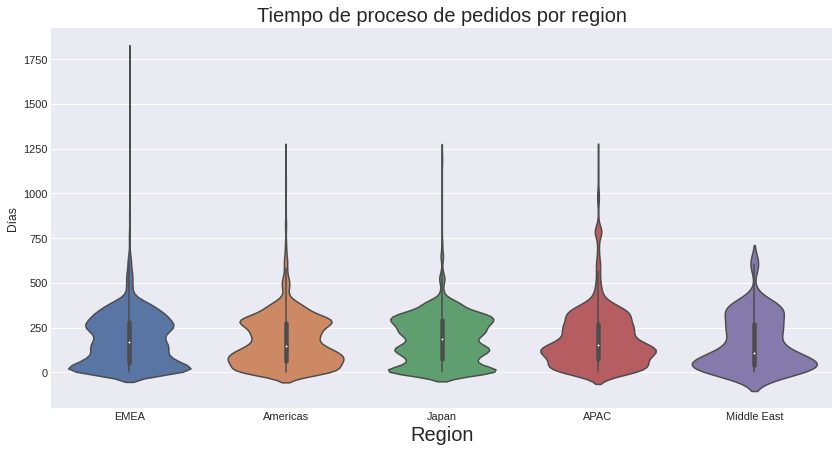

In [96]:
#filtramos algunos datos previos para visualizar
f, ax = mplt.subplots(figsize=(14, 7))
violin_plot = sns.violinplot(x="Region", y="tiempo_de_proceso", data=dataset)
violin_plot.set_ylabel("Días",fontsize=12)
violin_plot.set_title("Tiempo de proceso de pedidos por region",fontsize=20)

In [97]:
dataset['TRF'].value_counts()

0      11971
1       2192
2        626
3        354
5        297
       ...  
51         1
167        1
163        1
195        1
165        1
Name: TRF, Length: 101, dtype: int64

Text(0.5, 1.0, 'Tiempo de proceso de pedidos por stage')

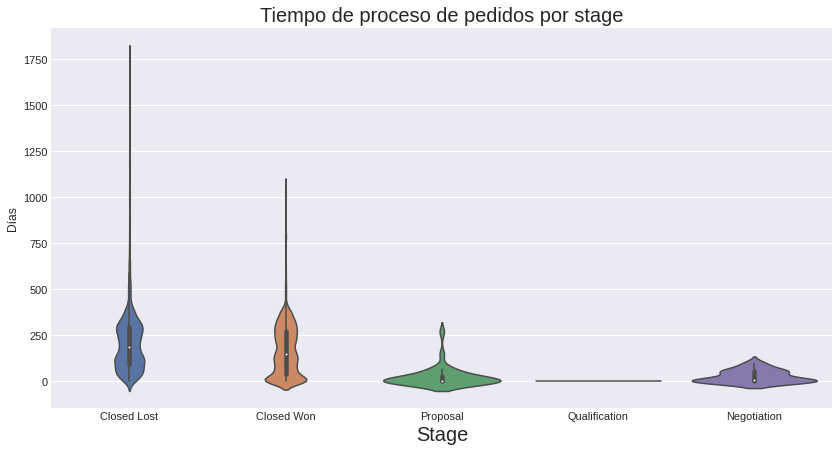

In [98]:
f, ax = mplt.subplots(figsize=(14, 7))
violin_plot = sns.violinplot(x="Stage", y="tiempo_de_proceso", data=dataset)
#boxplot = sns.catplot(x = "Stage", y="tiempo_de_proceso", kind="swarm", data=dataset)
violin_plot.set_ylabel("Días",fontsize=12)
violin_plot.set_title("Tiempo de proceso de pedidos por stage",fontsize=20)


In [99]:
#dataset['Total_Power'].value_counts()

In [100]:
dataset.loc[dataset['Territory']== 'Other','Territory'] = dataset.loc[dataset['Territory']== 'Other','Region']

In [101]:
dataset['Billing_Country'].value_counts().nlargest(20)

Japan             4878
United States     3802
Germany           1979
Australia         1169
India              672
Netherlands        563
Singapore          432
France             396
Spain              317
Italy              295
United Kingdom     284
Belgium            226
China              222
Thailand           195
Austria            145
Indonesia          142
Philippines        138
Luxembourg         136
Canada             120
Jordan             106
Name: Billing_Country, dtype: int64

In [102]:
tabla=dataset_wins[['Month','Total_Amount','Billing_Country']].groupby(['Month','Billing_Country']).agg({'Total_Amount': 'sum'})

#para llenar fechas faltantes con 0
tabla = tabla.unstack().fillna(0).stack().reset_index()
#tabla = tabla.fillna(0).reset_index()
tabla.loc[tabla['Billing_Country']== 'United States']
#tabla

,Month,Billing_Country,Total_Amount
47,2016 - 1,United States,5.274891e+07
96,2016 - 10,United States,1.626187e+07
145,2016 - 11,United States,1.860366e+07
194,2016 - 12,United States,1.041339e+07
243,2016 - 2,United States,3.847689e+07
292,2016 - 3,United States,3.569238e+07
341,2016 - 4,United States,6.428202e+07
390,2016 - 5,United States,3.122487e+07
439,2016 - 6,United States,5.163255e+07
488,2016 - 7,United States,3.084527e+07


In [103]:
lista_top_paises = tabla.groupby('Billing_Country').agg({'Total_Amount': 'sum'}).reset_index().nlargest(9, 'Total_Amount')['Billing_Country'].tolist()
tabla = tabla[tabla['Billing_Country'].isin(lista_top_paises)]
tabla = tabla.fillna(0).sort_values(by='Month', ascending=True)
#dataset_wins['Billing_Country'].value_counts()
tabla['Month'] = pd.to_datetime(tabla['Month'], format="%Y - %m")
#order= dataset_wins['Delivery_Period'].unique()
#order.sort()

In [104]:
tabla.loc[tabla['Billing_Country']== 'Turkey']

,Month,Billing_Country,Total_Amount
44,2016-01-01,Turkey,0.0
93,2016-10-01,Turkey,0.0
142,2016-11-01,Turkey,0.0
191,2016-12-01,Turkey,0.0
240,2016-02-01,Turkey,0.0
289,2016-03-01,Turkey,0.0
338,2016-04-01,Turkey,0.0
387,2016-05-01,Turkey,0.0
436,2016-06-01,Turkey,0.0
485,2016-07-01,Turkey,0.0


In [105]:
tabla['Month'].unique()

array(['2016-01-01T00:00:00.000000000', '2016-10-01T00:00:00.000000000',
       '2016-11-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2016-02-01T00:00:00.000000000', '2016-03-01T00:00:00.000000000',
       '2016-04-01T00:00:00.000000000', '2016-05-01T00:00:00.000000000',
       '2016-06-01T00:00:00.000000000', '2016-07-01T00:00:00.000000000',
       '2016-08-01T00:00:00.000000000', '2016-09-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2017-02-01T00:00:00.000000000', '2017-03-01T00:00:00.000000000',
       '2017-04-01T00:00:00.000000000', '2017-05-01T00:00:00.000000000',
       '2017-06-01T00:00:00.000000000', '2017-07-01T00:00:00.000000000',
       '2017-08-01T00:00:00.000000000', '2017-09-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2018-12-01

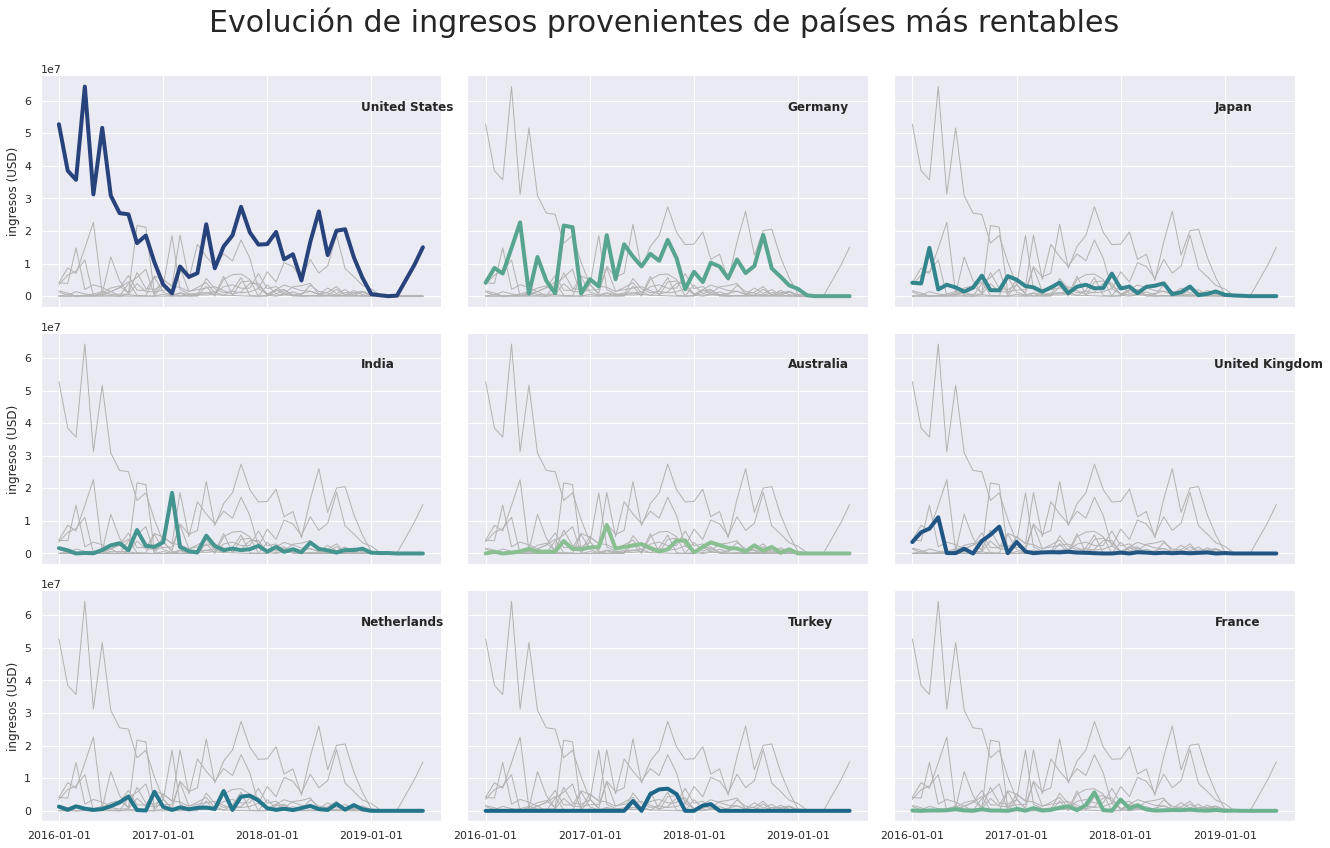

In [106]:
#sns.set_theme(style="dark")
sns.set_theme()
# Plot each year's time series in its own facet
g = sns.relplot(
    data=tabla,
    x="Month", y="Total_Amount", col="Billing_Country", hue="Billing_Country",
    kind="line", palette="crest", linewidth=4, zorder=5,row_order= lista_top_paises,
    col_order = lista_top_paises,
    col_wrap=3, height=4, aspect=1.55, legend=False
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    plot = sns.lineplot(
        data=tabla, x="Month", y="Total_Amount", units="Billing_Country",
        estimator=None, color=".7", linewidth=1, ax=ax
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])
#ax.set_yticks(ax.get_yticks()[::1])
# Tweak the supporting aspects of the plot
g.set_axis_labels("", "ingresos (USD)")
#ax.set_yscale('log')
g.tight_layout()
g.set_titles("")
#mplt.subplots_adjust(top=0.9)
g.fig.suptitle("Evolución de ingresos provenientes de países más rentables", size=30)
g.fig.subplots_adjust(top=.9)
g.savefig("evolucion_ingresos_pais.png")

In [107]:
dataset['Opportunity_ID']

0            0
1            1
2            2
3            3
4            4
         ...  
16942    12801
16943    12801
16944    12801
16945    12802
16946    12803
Name: Opportunity_ID, Length: 16946, dtype: int64

In [108]:
oportunidades = dataset.groupby('Opportunity_ID').agg({'Total_Amount': sum , 'Stage': 'first', 'count': 'count', 'Opportunity_Owner':'first','Opportunity_Created_Date': 'first'}).reset_index()
oportunidades_owner = oportunidades.sort_values(by=['Opportunity_Owner', 'Opportunity_Created_Date'])

In [109]:
oportunidades= oportunidades.loc[(oportunidades['Stage']=='Closed Won') | (oportunidades['Stage']=='Closed Lost'),:]

In [110]:
oportunidades['Grupo'] = oportunidades.Stage.shift().ne(dataset['Stage']).cumsum()
oportunidades
oportunidades_won =oportunidades.loc[(oportunidades['Stage']=='Closed Won')]
#grouped_won= oportunidades_won.groupby(['Grupo']).agg({'count':'count'}).reset_index()

oportunidades_lost =oportunidades.loc[(oportunidades['Stage']=='Closed Lost')]

#grouped_lost= oportunidades_loss.groupby(['Grupo','Opportunity_Owner']).agg({'count':'count'}).reset_index()

In [111]:
oportunidades_grouped_won = oportunidades_won.groupby(['Grupo']).agg({'count':'count'}).reset_index()
oportunidades_grouped_won['Stage']= 'Closed Won'

oportunidades_grouped_lost = oportunidades_lost.groupby(['Grupo']).agg({'count':'count'}).reset_index()
oportunidades_grouped_lost['Stage']= 'Closed Lost'
grouped_continous = pd.concat([oportunidades_grouped_won,oportunidades_grouped_lost])
grouped_continous

values= np.arange(1,grouped_continous['count'].max()+1)
values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

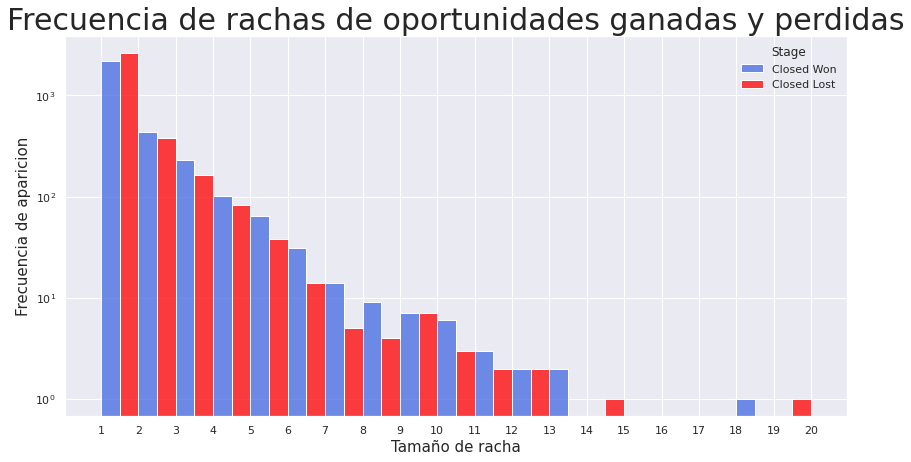

In [112]:
f, ax = mplt.subplots(figsize=(14, 7))
palette ={"Closed Won": "royalblue", "Closed Lost": "red"}

plot = sns.histplot(ax= ax,data=grouped_continous,bins= values,multiple="dodge", x="count", hue="Stage",kde = False,palette=palette)
mplt.xticks(values)
mplt.title('Frecuencia de rachas de oportunidades ganadas y perdidas',fontsize=30)
plot
#sns.countplot(ax= ax,data= grouped_continous, x="count", hue="Stage",palette=palette)
ax.set_xlabel("Tamaño de racha",fontsize=15)
ax.set_ylabel("Frecuencia de aparicion",fontsize=15)
ax.set_yscale('log')


Text(31.388554687499962, 0.5, 'Frecuencia')

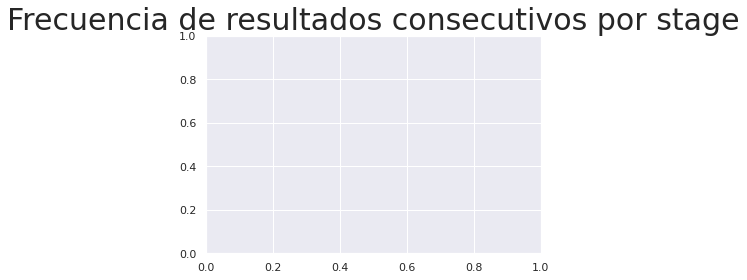

In [113]:
plot = sns.histplot(ax= ax,data=grouped_continous, x="count", hue="Stage",palette=palette)

mplt.title('Frecuencia de resultados consecutivos por stage',fontsize=30)
plot
sns.histplot(ax= ax,data= grouped_continous, x="count", hue="Stage", palette=palette)
ax.set_xlabel("oportuniades consecutivas",fontsize=15)
ax.set_ylabel("Frecuencia",fontsize=15)

Text(0.5, 1.0, 'Duracion y dueños de las rachas exitosas más largas')

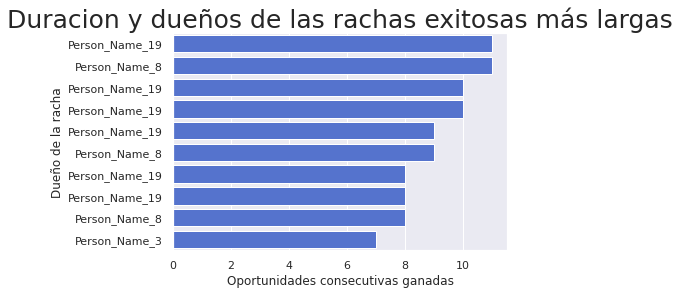

In [114]:
oportunidades_owner['Grupo'] = oportunidades_owner.groupby('Opportunity_Owner').Stage.shift().ne(dataset['Stage']).cumsum()

oportunidades_owner.groupby(['Opportunity_Owner', 'Grupo']).size().reset_index(level=1, drop=True)

oportunidades_won_owner = oportunidades_owner.loc[oportunidades_owner['Stage']== 'Closed Won']
oportunidades_loss_owner = oportunidades_owner.loc[oportunidades_owner['Stage']== 'Closed Lost']
grouped_won_owner= oportunidades_won_owner.groupby(['Grupo','Opportunity_Owner']).agg({'count':'count'}).reset_index()
#grouped_won_owner['Stage']= 'Closed Won'
grouped_loss_owner= oportunidades_loss_owner.groupby(['Grupo','Opportunity_Owner']).agg({'count':'count'}).reset_index()
#grouped_loss_owner['Stage']= 'Closed Lost'
#grouped_continous_owner= pd.concat([grouped_won_owner,grouped_loss_owner])

Oportunity_owners_top = grouped_won_owner.nlargest(10,'count')
Oportunity_owners_worst = grouped_loss_owner.nlargest(10,'count')

order= Oportunity_owners_top.index.to_list()
ax = sns.barplot(x="count", y=Oportunity_owners_top.index,color = 'royalblue', data=Oportunity_owners_top, order= order, orient='h')
ax.set_yticklabels(Oportunity_owners_top.Opportunity_Owner)
ax.set_xlabel("Oportunidades consecutivas ganadas")
ax.set_ylabel("Dueño de la racha")
mplt.title('Duracion y dueños de las rachas exitosas más largas',fontsize=25)

In [115]:
order= Oportunity_owners_worst.index.to_list()
Oportunity_owners_worst

,Grupo,Opportunity_Owner,count
1369,1613,Person_Name_3,15
1858,2273,Person_Name_8,12
868,1014,Person_Name_50,11
1327,1552,Person_Name_3,10
927,1083,Person_Name_50,9
1331,1557,Person_Name_43,9
1336,1565,Person_Name_43,9
3873,4747,Person_Name_3,9
12,16,Person_Name_50,8
1312,1538,Person_Name_3,8


Text(0.5, 1.0, 'Duración y dueños de las rachas malogradas más largas')

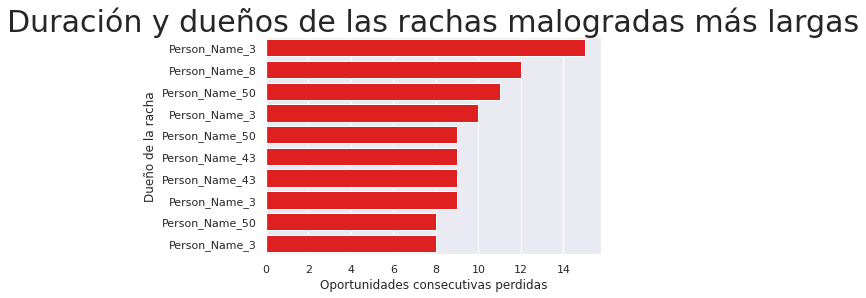

In [116]:
ax = sns.barplot(x="count", y=Oportunity_owners_worst.index,color = 'red', data=Oportunity_owners_worst, order= order, orient='h')
ax.set_yticklabels(Oportunity_owners_worst.Opportunity_Owner)
ax.set_xlabel("Oportunidades consecutivas perdidas")
ax.set_ylabel("Dueño de la racha")
mplt.title('Duración y dueños de las rachas malogradas más largas',fontsize=30)

In [117]:
Oportunity_owners_worst = grouped_loss_owner.nlargest(10,'count')
Oportunity_owners_worst

,Grupo,Opportunity_Owner,count
1369,1613,Person_Name_3,15
1858,2273,Person_Name_8,12
868,1014,Person_Name_50,11
1327,1552,Person_Name_3,10
927,1083,Person_Name_50,9
1331,1557,Person_Name_43,9
1336,1565,Person_Name_43,9
3873,4747,Person_Name_3,9
12,16,Person_Name_50,8
1312,1538,Person_Name_3,8


Text(0, 0.5, 'Variables')

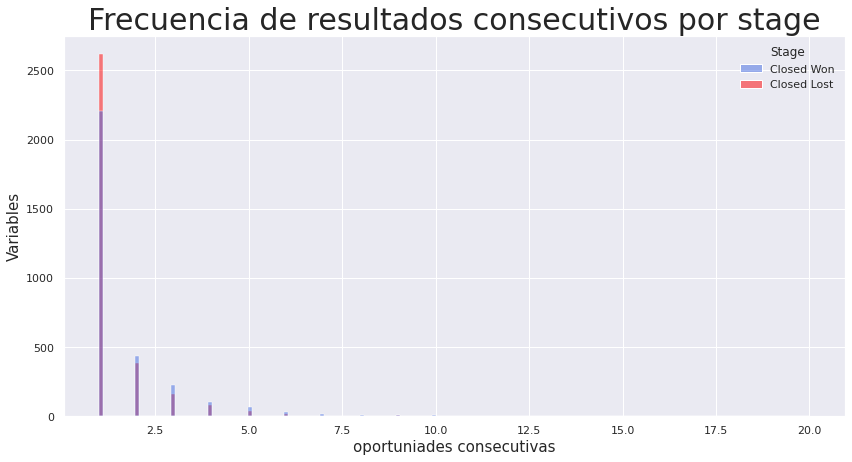

In [118]:
f, ax = mplt.subplots(figsize=(14, 7))
palette ={"Closed Won": "royalblue", "Closed Lost": "red"}

#plot = sns.histplot(ax= ax,data=grouped_continous_owner, x="count", hue="Stage",multiple="dodge",palette=palette)

mplt.title('Frecuencia de resultados consecutivos por stage',fontsize=30)
plot
sns.histplot(ax= ax,data= grouped_continous, x="count", hue="Stage",palette=palette)
ax.set_xlabel("oportuniades consecutivas",fontsize=15)
ax.set_ylabel("Variables",fontsize=15)


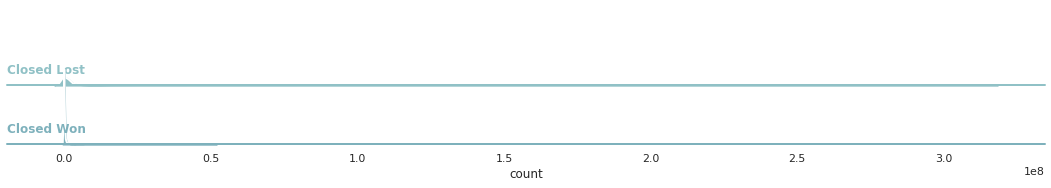

In [119]:
# Initialize the FacetGrid object
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(oportunidades, row="Stage", hue="Stage", aspect=10, height=1.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Total_Amount",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Total_Amount", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(mplt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = mplt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "count")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [120]:
oportunidades['max'] = oportunidades['Total_Amount']
oportunidades['min'] = oportunidades['Total_Amount']
oportunidades['mean'] = oportunidades['Total_Amount']
oportunidades['std'] = oportunidades['Total_Amount']
oportunidades_grouped = oportunidades.groupby('Opportunity_Owner').agg({'mean': 'mean', 'std': 'std'}).fillna(0).reset_index()

Text(0.5, 1.0, 'Distribucion de los costos por cada oportunidad separado por stages')

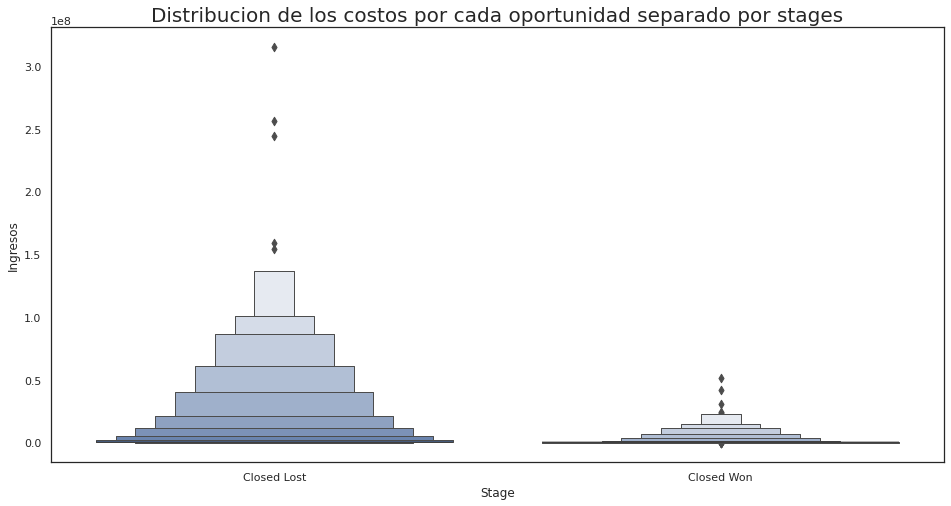

In [121]:
fig, ax = mplt.subplots(figsize=(16,8))         # Sample figsize in inches
sns.set_theme(style="dark")
boxenplot = sns.boxenplot(x="Stage", y="Total_Amount",
              color="b",
              scale="linear", data=oportunidades)
boxenplot.set_ylabel("Ingresos",fontsize=12)
boxenplot.set_title("Distribucion de los costos por cada oportunidad separado por stages",fontsize=20)

Text(0.0, 1.0, 'Boxplot with jitter')

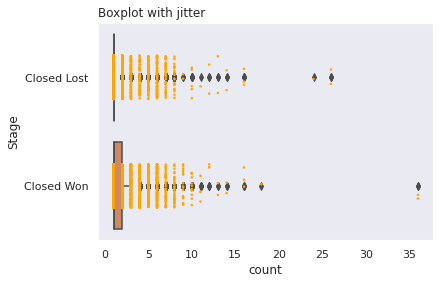

In [122]:
ax = sns.boxplot(x='count', y='Stage', data=oportunidades)
ax = sns.stripplot(x='count', y='Stage', data=oportunidades, color="orange", jitter=0.2, size=2.5)
mplt.title("Boxplot with jitter", loc="left")


In [123]:
dataset['ASP_(converted)'].nlargest(20)

2200     67.00000
2179     57.68578
16114     1.70000
16117     1.60000
16118     1.60000
16119     1.60000
16120     1.60000
16121     1.60000
16122     1.60000
7521      1.00000
9222      1.00000
1468      0.78000
16143     0.75000
16108     0.74000
16109     0.74000
16111     0.74000
16112     0.74000
527       0.71923
2510      0.71923
2517      0.71923
Name: ASP_(converted), dtype: float64

In [124]:
(dataset['Quote_Expiry_Date'] - dataset['Opportunity_Created_Date']).max()

Timedelta('1798 days 00:00:00')

In [125]:
#stages por registros
#dataset_count= top_products.groupby('Product_Name').agg({'count':'count'}).reset_index()

#values= dataset_count['count'].tolist()
#labels = dataset_count['Product_Name'].tolist()
#squarify.plot(sizes=values, label= labels, color=cmaps[flag], alpha=.4 )
#mplt.axis('off')
#mplt.show()
#dataset_count

In [126]:
dataset_quoted = dataset.loc[dataset['Quote_Expiry_Date'].notna()] 
dataset_quoted['Quote_Expiry_Date'].notna().value_counts()

True    12322
Name: Quote_Expiry_Date, dtype: int64

In [127]:
dataset_quoted.loc[:,'quote_time']= dataset_quoted.loc[:,'Quote_Expiry_Date'] - dataset_quoted.loc[:,'Opportunity_Created_Date']

/home/lucas/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/lucas/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [128]:
dataset['Source '].value_counts()

None         9497
Source_7     2965
Source_9     1459
Source_11    1420
Source_13     786
Source_3      418
Source_1      137
Source_10     106
Source_2       86
Source_4       43
Source_6       19
Source_0        7
Source_12       2
Source_5        1
Name: Source , dtype: int64

In [129]:
dataset[dataset['Total_Amount_Currency']!=dataset['Total_Taxable_Amount_Currency']]['Total_Taxable_Amount']

1594     1.406176e+04
2200     1.356339e+09
3579     9.043541e+05
3683     4.060963e+04
3940     1.097874e+06
3941     6.631634e+06
3942     2.079663e+06
4805     5.526570e+05
5257     9.654372e+05
5436     1.186711e+05
6327     6.005940e+07
6328     6.005940e+07
6987     1.669562e+07
6988     1.669562e+07
6989     1.669562e+07
7253     9.591247e+06
7254     9.591247e+06
7255     9.591247e+06
7503     4.891061e+06
9640     0.000000e+00
9641     0.000000e+00
12769    1.096143e+06
13475    6.467192e+04
15188    3.204172e+03
15716    2.403129e+05
15880    3.083700e+05
16010    4.672750e+03
16063    1.186730e+07
16178    0.000000e+00
16349    5.086758e+06
16634    3.238840e+06
16635    3.238840e+06
16827    2.698583e+05
Name: Total_Taxable_Amount, dtype: float64

In [130]:
dataset[dataset['Total_Amount']>dataset['Total_Taxable_Amount']]['Total_Taxable_Amount'].eq(0).value_counts()

False    2311
True      899
Name: Total_Taxable_Amount, dtype: int64

In [131]:
dataset.dtypes

ID                                              int64
Region                                         object
Territory                                      object
Pricing, Delivery_Terms_Quote_Appr              int64
Pricing, Delivery_Terms_Approved                int64
Bureaucratic_Code_0_Approval                    int64
Bureaucratic_Code_0_Approved                    int64
Bureaucratic_Code                              object
Account_Created_Date                   datetime64[ns]
Source                                         object
Billing_Country                                object
Account_Name                                   object
Opportunity_Name                               object
Opportunity_ID                                  int64
Sales_Contract_No                              object
Account_Owner                                  object
Opportunity_Owner                              object
Account_Type                                   object
Opportunity_Type            

# Converor para taxable amount

In [132]:
dataset['conversion'] = dataset['ASP_(converted)']/dataset['ASP']

cotizacion = dataset.groupby(['ASP_Currency', 'Opportunity_Created_Date']).agg({'conversion': 'mean'}).reset_index()
#print(dataset[dataset['Stage']== 'Closed Won']['conversion'].value_counts())
cotizacion_impuesto = cotizacion.rename(columns = {'ASP_Currency':'Currency_Impuesto','conversion': 'conversion_diaria_impuesto'})
cotizacion_impuesto

,Currency_Impuesto,Opportunity_Created_Date,conversion_diaria_impuesto
0,AUD,2015-04-23,0.707613
1,AUD,2016-02-10,0.707608
2,AUD,2016-03-01,0.707608
3,AUD,2016-03-08,0.707608
4,AUD,2016-04-06,0.707608
...,...,...,...
2351,USD,2018-12-21,1.000000
2352,USD,2018-12-22,1.000000
2353,USD,2018-12-24,1.000000
2354,USD,2018-12-28,1.000000


In [133]:
dataset= dataset.merge(cotizacion_impuesto, left_on = ['Total_Taxable_Amount_Currency', 'Opportunity_Created_Date'], right_on = ['Currency_Impuesto', 'Opportunity_Created_Date'], how = 'left')

In [143]:
dataset['conversion_impuestos'] = 0
dataset.loc[dataset['Currency_Impuesto'] == dataset['ASP_Currency'],'conversion_impuestos' ]= dataset.loc[dataset['Currency_Impuesto'] == dataset['ASP_Currency'],'ASP_(converted)']/dataset.loc[(dataset['Currency_Impuesto']== dataset['ASP_Currency']),'ASP']
dataset.loc[dataset['conversion_impuestos'] == 0, 'conversion_impuestos'] = dataset.loc[dataset['conversion_impuestos'] == 0,'conversion_diaria_impuesto']

dataset['conversion_impuestos'] = dataset.loc[:,'conversion_impuestos'].fillna(dataset['conversion_diaria_impuesto'])
dataset.loc[dataset.ASP_Currency == 'JPY' , 'conversion_impuestos']= dataset.loc[dataset.ASP_Currency == 'JPY' , 'conversion_impuestos'].fillna( dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion_impuestos'].mean())
dataset.loc[dataset.ASP_Currency == 'EUR' , 'conversion_impuestos']= dataset.loc[dataset.ASP_Currency == 'EUR' , 'conversion_impuestos'].fillna( dataset.loc[dataset.ASP_Currency == 'EUR', 'conversion_impuestos'].mean())
dataset.loc[dataset.ASP_Currency == 'USD' , 'conversion_impuestos']= dataset.loc[dataset.ASP_Currency == 'USD' , 'conversion_impuestos'].fillna(1)
dataset[dataset['conversion_impuestos'].isna()]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,...,Tiempo_Desde_Creacion_De_Cuenta,tiempo_hasta_entrega,tiempo_esperado_entrega,ganado,Tiene_Contrato,tiempo_de_proceso,tiempo_hasta_vencimiento,Currency_Impuesto,conversion_diaria_impuesto,conversion_impuestos


In [ ]:

#dataset['conversion_impuestos'].isna().value_counts()
#dataset['conversion_impuestos'].value_counts()
#currencies_definidas.loc['conversion_impuestos']= currencies_definidas['ASP_(converted)']/currencies_definidas['ASP']

In [144]:
dataset['Total_Taxable_Amount'] = dataset['Total_Taxable_Amount'] * dataset['conversion_impuestos']

In [147]:
dataset[dataset['Total_Amount']>dataset['Total_Taxable_Amount']]['Total_Taxable_Amount'].eq(0).value_counts()

True     899
False     25
Name: Total_Taxable_Amount, dtype: int64